<a href="https://colab.research.google.com/github/jeong1suk/sto-data/blob/main/predict_baechu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
# plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def year_baechu_analysis(year, data):
    print(f"=== {year}년 기본 정보 ===")
    print("총 거래 기록:", data.shape[0], "건")

    # 날짜 범위 확인
    dates = data['AUC_YMD'].dropna().unique()
    dates.sort()
    print("날짜 범위:", dates[0], "~", dates[-1])
    print("총 거래일수:", len(dates))

    # 연도별 가격 통계
    valid_prices = data[data['PRCE_PER_KG'] > 0]['PRCE_PER_KG']

    print("\n=== 연도별 kg당 가격 통계 ===")
    print(f"평균: {valid_prices.mean():.0f}원/kg")
    print(f"중앙값: {valid_prices.median():}원/kg")
    print(f"최저: {valid_prices.min()}원/kg")
    print(f"최고: {valid_prices.max()}원/kg")
    print(f"표준편차: {valid_prices.std():.0f}원/kg")

    # 월별 평균
    data['month'] = pd.to_datetime(data['AUC_YMD']).dt.strftime('%m')
    monthly_avg = data.groupby('month')['PRCE_PER_KG'].mean().round(0)

    print(f"\n=== {year}년 월별 평균 kg당 가격 ===")
    for month, avg_price in monthly_avg.items():
        print(f"{month}월: {avg_price}원/kg")

# 20년 배추 가격

**기본 정보:**

* 총 66,307건의 거래 기록 (306거래일)
* 10개 배추 종류, 3개 주요 등급 (특, 상, 보통)
* kg당 평균 2,684원 (최저 37.5원 ~ 최고 78,125원)

**주요 산지**: 전남 해남, 경북 김천, 경기 양평, 강원 평창 등

**계절별 가격 패턴:**

* 최고가: 4월(4,161원), 8월(4,613원) - 단경기
* 최저가: 11월(1,054원), 10월(1,642원) - 김장철

In [ ]:
data2020 = pd.read_csv("/content/baechu_data_2020.csv")

In [ ]:
data2020.columns

Index(['Unnamed: 0', 'SN', 'AUC_YMD', 'WHSL_MRKT_CODE', 'WHSL_MRKT_NM',
       'WMK_CORP_CODE', 'WMK_CORP_NM', 'PDLT_CODE', 'PDLT_NM', 'SPCS_CODE',
       'SPCS_NM', 'UNIT_CODE', 'UNIT_NM', 'PKG_STLE_CODE', 'PKG_STLE_NM',
       'NOP_CODE', 'NOP_NM', 'MTC_GRAD_CODE', 'MTC_GRAD_NM', 'MTC_NM',
       'UNIT_QYT', 'PRCE', 'ETL_LDG_DT', 'KG_UNIT_CNVR_QYT', 'PRCE_PER_KG'],
      dtype='object')

In [ ]:
print("총 행 수:", data2020.shape[0])
print("컬럼 수:", data2020.shape[1])
print("컬럼 명:", list(data2020.columns))

print("\n=== 첫 5행 데이터 ===")
data2020.head()

총 행 수: 66307
컬럼 수: 25
컬럼 명: ['Unnamed: 0', 'SN', 'AUC_YMD', 'WHSL_MRKT_CODE', 'WHSL_MRKT_NM', 'WMK_CORP_CODE', 'WMK_CORP_NM', 'PDLT_CODE', 'PDLT_NM', 'SPCS_CODE', 'SPCS_NM', 'UNIT_CODE', 'UNIT_NM', 'PKG_STLE_CODE', 'PKG_STLE_NM', 'NOP_CODE', 'NOP_NM', 'MTC_GRAD_CODE', 'MTC_GRAD_NM', 'MTC_NM', 'UNIT_QYT', 'PRCE', 'ETL_LDG_DT', 'KG_UNIT_CNVR_QYT', 'PRCE_PER_KG']

=== 첫 5행 데이터 ===


,Unnamed: 0,SN,AUC_YMD,WHSL_MRKT_CODE,WHSL_MRKT_NM,WMK_CORP_CODE,WMK_CORP_NM,PDLT_CODE,PDLT_NM,SPCS_CODE,...,NOP_CODE,NOP_NM,MTC_GRAD_CODE,MTC_GRAD_NM,MTC_NM,UNIT_QYT,PRCE,ETL_LDG_DT,KG_UNIT_CNVR_QYT,PRCE_PER_KG
0,2662,20,2020-01-03,110001,서울가락도매,11000102,농협가락(공),1001,배추,100199.0,...,100,.,11,특,경기 여주군,6.0,20000.0,20210629184341,2.0,10000.0
1,2663,21,2020-01-03,110001,서울가락도매,11000102,농협가락(공),1001,배추,100199.0,...,100,.,11,특,경기 여주군,6.0,21000.0,20210629184341,2.0,10500.0
2,2664,25,2020-01-03,110001,서울가락도매,11000106,대아청과,1001,배추,100104.0,...,103,3개,11,특,전라남도 해남군,800.0,8500.0,20210629184341,10.0,850.0
3,2665,26,2020-01-03,110001,서울가락도매,11000106,대아청과,1001,배추,100104.0,...,103,3개,12,상,전라남도 해남군,200.0,5100.0,20210629184341,10.0,510.0
4,2666,27,2020-01-03,110001,서울가락도매,11000106,대아청과,1001,배추,100104.0,...,103,3개,11,특,전라남도 해남군,760.0,9500.0,20210629184341,10.0,950.0


In [ ]:
# NaN 값 확인 및 제거 (JavaScript의 filter(date => date)와 유사)
df_filtered = data2020.dropna(subset=['AUC_YMD']).copy() # 날짜가 없는 행 제거

# 2. 날짜 범위 및 주요 특성 분석
# JavaScript의 map().filter().sort() 대체
if not df_filtered.empty:
    df_filtered['AUC_YMD'] = pd.to_datetime(df_filtered['AUC_YMD']) # 혹시 파싱이 안됐을까봐 다시 확인
    min_date = df_filtered['AUC_YMD'].min().strftime('%Y-%m-%d')
    max_date = df_filtered['AUC_YMD'].max().strftime('%Y-%m-%d')
    total_unique_dates = df_filtered['AUC_YMD'].nunique()

    print(f"날짜 범위: {min_date} ~ {max_date}")
    print(f"총 거래일수: {total_unique_dates}")
else:
    print("날짜 데이터를 찾을 수 없어 날짜 범위 분석을 건너뜜니다.")


# 3. 배추 종류별 분석
if 'SPCS_NM' in data2020.columns:
    species_count = data2020['SPCS_NM'].value_counts().sort_index()
    print("\n=== 배추 종류별 거래 건수 ===")
    print(species_count)
else:
    print("\n경고: 'SPCS_NM' 컬럼이 데이터에 없습니다.")


# 4. 등급별 분석
if 'MTC_GRAD_NM' in data2020.columns:
    grade_count = data2020['MTC_GRAD_NM'].value_counts().sort_index()
    print("\n=== 등급별 거래 건수 ===")
    print(grade_count)
else:
    print("\n경고: 'MTC_GRAD_NM' 컬럼이 데이터에 없습니다.")


# 5. 가격 분석 (kg당 가격 기준) (JavaScript의 filter().map() 및 _.mean, _.min, _.max 대체)
if 'PRCE_PER_KG' in data2020.columns:
    # PRCE_PER_KG가 NaN이 아니면서 0보다 큰 값만 필터링
    valid_prices = data2020[data2020['PRCE_PER_KG'].notna() & (data2020['PRCE_PER_KG'] > 0)]['PRCE_PER_KG']

    if not valid_prices.empty:
        mean_price = np.mean(valid_prices)
        median_price = np.median(valid_prices) # numpy의 median 사용
        min_price = np.min(valid_prices)
        max_price = np.max(valid_prices)

        print("\n=== 2020년 kg당 가격 통계 ===")
        print(f"평균: {mean_price:.0f}원/kg")
        print(f"중앙값: {median_price:.0f}원/kg") # 중앙값도 정수로 표시
        print(f"최저: {min_price:.0f}원/kg")
        print(f"최고: {max_price:.0f}원/kg")
    else:
        print("\n유효한 'PRCE_PER_KG' 데이터가 없어 가격 통계를 계산할 수 없습니다.")
else:
    print("\n경고: 'PRCE_PER_KG' 컬럼이 데이터에 없습니다. 'PRCE'와 'KG_UNIT_CNVR_QYT'로 계산 필요.")
    # PRCE_PER_KG 컬럼이 없는 경우, 직접 계산 로직 추가
    if 'PRCE' in data2020.columns and 'KG_UNIT_CNVR_QYT' in data2020.columns:
        # KG_UNIT_CNVR_QYT가 0인 경우 NaN 방지
        data2020['KG_UNIT_CNVR_QYT'] = data2020['KG_UNIT_CNVR_QYT'].replace(0, np.nan)
        data2020['PRCE_PER_KG'] = data2020['PRCE'] / data2020['KG_UNIT_CNVR_QYT']
        valid_prices = data2020[data2020['PRCE_PER_KG'].notna() & (data2020['PRCE_PER_KG'] > 0)]['PRCE_PER_KG']

        if not valid_prices.empty:
            mean_price = np.mean(valid_prices)
            median_price = np.median(valid_prices)
            min_price = np.min(valid_prices)
            max_price = np.max(valid_prices)

            print("\n=== 2020년 kg당 가격 통계 (계산된 PRCE_PER_KG 사용) ===")
            print(f"평균: {mean_price:.0f}원/kg")
            print(f"중앙값: {median_price:.0f}원/kg")
            print(f"최저: {min_price:.0f}원/kg")
            print(f"최고: {max_price:.0f}원/kg")
        else:
            print("\n유효한 'PRCE_PER_KG' 데이터 (계산 후)가 없어 가격 통계를 계산할 수 없습니다.")

날짜 범위: 2020-01-03 ~ 2020-12-31
총 거래일수: 306

=== 배추 종류별 거래 건수 ===
SPCS_NM
고냉지배추        5809
기타배추        17494
김장(가을)배추    10213
봄배추          4424
쌈배추         17416
여름배추         2319
우거지            69
월동배추         3341
저장배추         2877
절임배추         2345
Name: count, dtype: int64

=== 등급별 거래 건수 ===
MTC_GRAD_NM
.        52
4등       30
5등       27
6등       28
등외       29
보통     1207
상     15792
특     49142
Name: count, dtype: int64

=== 2020년 kg당 가격 통계 ===
평균: 2684원/kg
중앙값: 1300원/kg
최저: 38원/kg
최고: 78125원/kg


In [ ]:
# 필요한 컬럼이 있는지 확인
required_cols = ['MTC_NM', 'AUC_YMD', 'PRCE_PER_KG', 'SPCS_NM']
for col in required_cols:
    if col not in data2020.columns:
        print(f"경고: 필수 컬럼 '{col}'이 데이터에 없습니다. 해당 분석은 건너뜁니다.")
        # 해당 컬럼이 없으면 관련 분석을 건너뛸 수 있도록 플래그 설정
        if col == 'MTC_NM': has_mtc_nm = False
        if col == 'AUC_YMD': has_auc_ymd = False
        if col == 'PRCE_PER_KG': has_prce_per_kg = False
        if col == 'SPCS_NM': has_spcs_nm = False

# 1. 주산지 분석 (JavaScript의 _.countBy, sort, slice 대체)
if 'MTC_NM' in data2020.columns:
    origin_count = data2020['MTC_NM'].value_counts() # 자동으로 내림차순 정렬됨
    top_origins = origin_count.head(10) # 상위 10개 선택

    print("\n=== 주요 산지 TOP 10 ===")
    for origin, count in top_origins.items():
        print(f"{origin}: {count}건")
else:
    print("\n'MTC_NM' 컬럼이 없어 주산지 분석을 건너뜜니다.")


# 2. 월별 평균 가격 분석 (JavaScript의 filter, map, groupBy, mapValues, mean 대체)
if 'AUC_YMD' in data2020.columns and 'PRCE_PER_KG' in data2020.columns:
    # 유효한 가격 데이터만 필터링하고, PRCE_PER_KG가 0보다 큰 값만 사용
    monthly_data_filtered = data2020[data2020['AUC_YMD'].notna() & data2020['PRCE_PER_KG'].notna() & (data2020['PRCE_PER_KG'] > 0)].copy()

    if not monthly_data_filtered.empty:
        # AUC_YMD 컬럼을 datetime 타입으로 명시적 변환
        # errors='coerce' 옵션은 파싱 불가능한 값을 NaT (Not a Time)로 만듭니다.
        monthly_data_filtered['AUC_YMD'] = pd.to_datetime(monthly_data_filtered['AUC_YMD'], errors='coerce')

        # NaT 값 제거 (파싱 실패한 날짜는 분석에서 제외)
        monthly_data_filtered = monthly_data_filtered.dropna(subset=['AUC_YMD'])

        # 월 추출
        monthly_data_filtered['month'] = monthly_data_filtered['AUC_YMD'].dt.strftime('%m')

        # 월별 평균 가격 계산
        monthly_avg = monthly_data_filtered.groupby('month')['PRCE_PER_KG'].mean().round(0).astype(int)

        print("\n=== 2020년 월별 평균 kg당 가격 ===")
        # 월 순서대로 출력 (인덱스가 이미 월 순으로 정렬됨)
        for month, avg_price in monthly_avg.items():
            print(f"{month}월: {avg_price}원/kg")
    else:
        print("\n유효한 'AUC_YMD' 또는 'PRCE_PER_KG' 데이터가 없어 월별 평균 가격 분석을 건너뜜니다.")
else:
    print("\n'AUC_YMD' 또는 'PRCE_PER_KG' 컬럼이 없어 월별 평균 가격 분석을 건너뜜니다.")


# 3. 배추 종류별 계절성 간단 분석 (JavaScript의 filter, mean 대체)
if 'SPCS_NM' in data2020.columns and 'PRCE_PER_KG' in data2020.columns:
    main_species = ['월동배추', '봄배추', '여름배추', '김장(가을)배추', '고냉지배추']
    print("\n=== 주요 배추 종류별 거래 현황 ===")

    for species in main_species:
        # 해당 종류의 배추 데이터 필터링
        species_data = data2020[data2020['SPCS_NM'] == species].copy()

        # 거래 건수 계산
        count = len(species_data)

        # 유효한 가격 데이터만 필터링하여 평균 계산
        valid_species_prices = species_data[species_data['PRCE_PER_KG'].notna() & (species_data['PRCE_PER_KG'] > 0)]['PRCE_PER_KG']

        avg_price = np.nan # 기본값은 NaN
        if not valid_species_prices.empty:
            avg_price = round(np.mean(valid_species_prices))

        print(f"{species}: {count}건, 평균 {avg_price if not np.isnan(avg_price) else 'N/A'}원/kg")
else:
    print("\n'SPCS_NM' 또는 'PRCE_PER_KG' 컬럼이 없어 주요 배추 종류별 거래 현황 분석을 건너뜜니다.")


=== 주요 산지 TOP 10 ===
전라남도 해남군: 10277건
경상북도 김천시: 8101건
경기도 양평군: 5705건
강원도 평창군: 5177건
경상북도 영양군: 3119건
강원도 강릉시: 2887건
전라남도 진도군: 1740건
강원도 태백시: 1701건
경상남도 밀양시: 1339건
강원도 횡성군: 1254건

=== 2020년 월별 평균 kg당 가격 ===
01월: 3108원/kg
02월: 2773원/kg
03월: 3235원/kg
04월: 4161원/kg
05월: 2467원/kg
06월: 2355원/kg
07월: 2682원/kg
08월: 4613원/kg
09월: 3735원/kg
10월: 1642원/kg
11월: 1054원/kg
12월: 1873원/kg

=== 주요 배추 종류별 거래 현황 ===
월동배추: 3341건, 평균 627원/kg
봄배추: 4424건, 평균 571원/kg
여름배추: 2319건, 평균 654원/kg
김장(가을)배추: 10213건, 평균 454원/kg
고냉지배추: 5809건, 평균 1403원/kg


# 21년 배추 가격

1. 계절성 패턴의 불일치

    * 2020년: 8월 최고가(4,613원), 11월 최저가(1,054원)
    * 2021년: 4월 최고가(4,037원), 11월 최저가(1,553원)
    * 8월 가격: 2020년 4,613원 → 2021년 2,975원 (-35.5% 급락)
    * 10월 가격: 2020년 1,642원 → 2021년 2,822원 (+71.9% 급등)

2. 계절별 패턴 변화

    * 여름철: 2020년 고가 → 2021년 저가 (-739원)
    * 가을철: 2020년 저가 → 2021년 중가 (+394원)

In [ ]:
# 2021년 배추 데이터 분석
data2021 = pd.read_csv('baechu_data_2021.csv')

year_baechu_analysis(2021, data2021)

=== 2021년 기본 정보 ===
총 거래 기록: 69367 건
날짜 범위: 2021-01-04 ~ 2021-12-31
총 거래일수: 303

=== 연도별 kg당 가격 통계 ===
평균: 2703원/kg
중앙값: 1100.0원/kg
최저: 30.0원/kg
최고: 210000.0원/kg
표준편차: 4772원/kg

=== 2021년 월별 평균 kg당 가격 ===
01월: 3973.0원/kg
02월: 2540.0원/kg
03월: 3132.0원/kg
04월: 4037.0원/kg
05월: 2629.0원/kg
06월: 2054.0원/kg
07월: 2406.0원/kg
08월: 2974.0원/kg
09월: 3239.0원/kg
10월: 2821.0원/kg
11월: 1553.0원/kg
12월: 2198.0원/kg


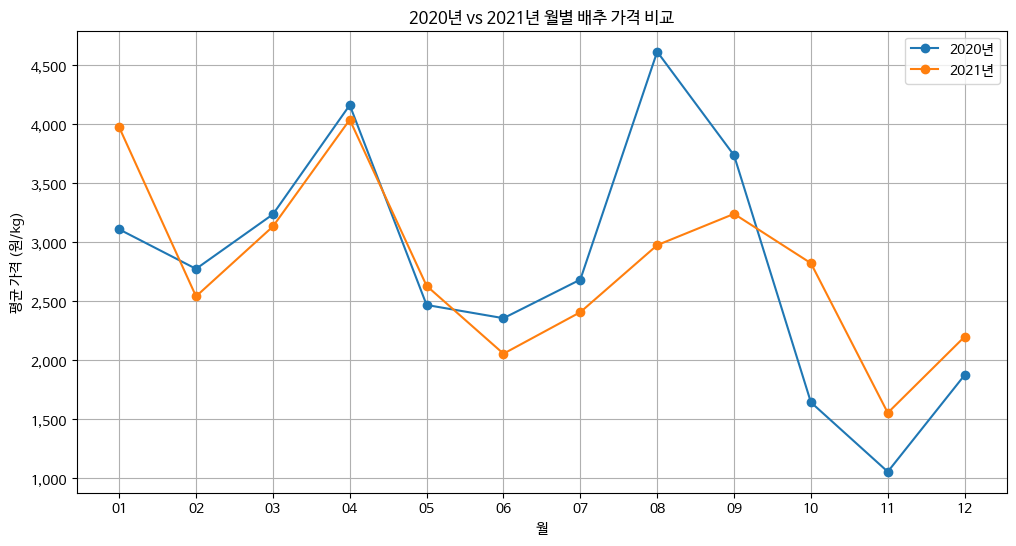

In [ ]:
# 2020년과 2021년 월별 평균 가격 데이터
months = monthly_avg.index
price_2020 = monthly_avg.values
price_2021 = monthly_avg_2021.values

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020년')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021년')

# 그래프 제목 및 축 레이블 설정
plt.title('2020년 vs 2021년 월별 배추 가격 비교')
plt.xlabel('월')
plt.ylabel('평균 가격 (원/kg)')
plt.grid(True)
plt.legend()

# y축 단위를 "원"으로 표시
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
# 월별 가격 차이 (퍼센트)
price_diff_percent = ((price_2021 - price_2020) / price_2020) * 100

print("=== 2020년 대비 2021년 월별 가격 등락률 ===")
for i, month in enumerate(months):
    print(f"{month}월: {price_diff_percent[i]:.2f}%")

=== 2020년 대비 2021년 월별 가격 등락률 ===
01월: 27.83%
02월: -8.40%
03월: -3.18%
04월: -2.98%
05월: 6.57%
06월: -12.78%
07월: -10.29%
08월: -35.53%
09월: -13.28%
10월: 71.80%
11월: 47.34%
12월: 17.35%


# 22년 배추 가격

주요 발견사항
1. 최고가 발생 월의 완전한 변화

    * 2020년: 8월 최고가 (4,613원) - 여름철 공급 부족
    * 2021년: 4월 최고가 (4,037원) - 봄철 공급 부족
    * 2022년: 7월 최고가 (3,722원) - 다시 여름철로 이동

2. 월별 가격 변동의 극심한 불규칙성

    * 8월: 2020년 4,613원 → 2021년 2,975원 → 2022년 3,721원
    * 4월: 2020년 4,161원 → 2021년 4,037원 → 2022년 2,592원
    * 10월: 2020년 1,642원 → 2021년 2,822원 → 2022년 2,035원

3. 계절성 패턴의 연도별 역전

    * 여름철: 2020년 고가(3,217원) → 2021년 저가(2,478원) → 2022년 고가(3,394원)
    * 봄철: 지속적 하락 (3,288원 → 3,266원 → 2,531원)

In [ ]:
data2022 = pd.read_csv("/content/baechu_data_2022.csv")
year_baechu_analysis(2022, data2022)

=== 2022년 기본 정보 ===
총 거래 기록: 65219 건
날짜 범위: 2022-01-03 ~ 2022-12-31
총 거래일수: 301

=== 연도별 kg당 가격 통계 ===
평균: 2591원/kg
중앙값: 1375.0원/kg
최저: 50.0원/kg
최고: 66666.66666666667원/kg
표준편차: 3398원/kg

=== 2021년 월별 평균 kg당 가격 ===
01월: 2723.0원/kg
02월: 2609.0원/kg
03월: 2706.0원/kg
04월: 2592.0원/kg
05월: 2296.0원/kg
06월: 2740.0원/kg
07월: 3722.0원/kg
08월: 3721.0원/kg
09월: 2974.0원/kg
10월: 2035.0원/kg
11월: 1170.0원/kg
12월: 1950.0원/kg


In [ ]:
# 3년간의 데이터를 모두 로드합니다.
data2020 = pd.read_csv('baechu_data_2020.csv')
data2021 = pd.read_csv('baechu_data_2021.csv')
data2022 = pd.read_csv('baechu_data_2022.csv')

# 각 연도의 월별 평균 가격을 계산하는 함수
def get_monthly_average(df):
    df['month'] = pd.to_datetime(df['AUC_YMD']).dt.strftime('%m')
    return df.groupby('month')['PRCE_PER_KG'].mean().round(0)

monthly_avg2020 = get_monthly_average(data2020)
monthly_avg2021 = get_monthly_average(data2021)
monthly_avg2022 = get_monthly_average(data2022)

# 3년간 월별 가격 비교
print("=== 2020-2022년 3년간 월별 가격 비교 ===")
print("월\t2020년\t2021년\t2022년\t연도간 최대차이")
print("---------------------------------------------------")

for i in range(1, 13):
    month = str(i).zfill(2)
    price2020 = monthly_avg2020.get(month, 0)
    price2021 = monthly_avg2021.get(month, 0)
    price2022 = monthly_avg2022.get(month, 0)

    prices = [p for p in [price2020, price2021, price2022] if p > 0]
    if not prices:
        diff = 0
    else:
        diff = max(prices) - min(prices)

    print(f"{month}월\t{int(price2020)}\t{int(price2021)}\t{int(price2022)}\t{int(diff)}원")

# 각 연도별 가격 변동성 분석
print("\n=== 연도별 가격 변동성 분석 ===")
for year, data in [('2020', monthly_avg2020), ('2021', monthly_avg2021), ('2022', monthly_avg2022)]:
    max_price = data.max()
    min_price = data.min()
    max_month = data.idxmax()
    min_month = data.idxmin()
    volatility = max_price - min_price
    print(f"{year}년: 최고 {max_month}월({int(max_price)}원), 최저 {min_month}월({int(min_price)}원), 변동폭 {int(volatility)}원")

# 계절성 일관성 분석
print("\n=== 계절별 가격 순위 변화 ===")
seasons = {
    '봄(3-5월)': ['03', '04', '05'],
    '여름(6-8월)': ['06', '07', '08'],
    '가을(9-11월)': ['09', '10', '11'],
    '겨울(12-2월)': ['12', '01', '02']
}

for name, months in seasons.items():
    avg2020 = monthly_avg2020[monthly_avg2020.index.isin(months)].mean()
    avg2021 = monthly_avg2021[monthly_avg2021.index.isin(months)].mean()
    avg2022 = monthly_avg2022[monthly_avg2022.index.isin(months)].mean()
    print(f"{name}: 2020년 {int(avg2020)}원, 2021년 {int(avg2021)}원, 2022년 {int(avg2022)}원")

=== 2020-2022년 3년간 월별 가격 비교 ===
월	2020년	2021년	2022년	연도간 최대차이
---------------------------------------------------
01월	3108	3973	2723	1250원
02월	2773	2540	2609	233원
03월	3234	3132	2706	528원
04월	4159	4037	2592	1567원
05월	2467	2629	2296	333원
06월	2354	2054	2740	686원
07월	2681	2406	3722	1316원
08월	4612	2974	3721	1638원
09월	3735	3239	2974	761원
10월	1642	2821	2035	1179원
11월	1053	1553	1170	500원
12월	1873	2198	1950	325원

=== 연도별 가격 변동성 분석 ===
2020년: 최고 08월(4612원), 최저 11월(1053원), 변동폭 3559원
2021년: 최고 04월(4037원), 최저 11월(1553원), 변동폭 2484원
2022년: 최고 07월(3722원), 최저 11월(1170원), 변동폭 2552원

=== 계절별 가격 순위 변화 ===
봄(3-5월): 2020년 3286원, 2021년 3266원, 2022년 2531원
여름(6-8월): 2020년 3215원, 2021년 2478원, 2022년 3394원
가을(9-11월): 2020년 2143원, 2021년 2537원, 2022년 2059원
겨울(12-2월): 2020년 2584원, 2021년 2903원, 2022년 2427원


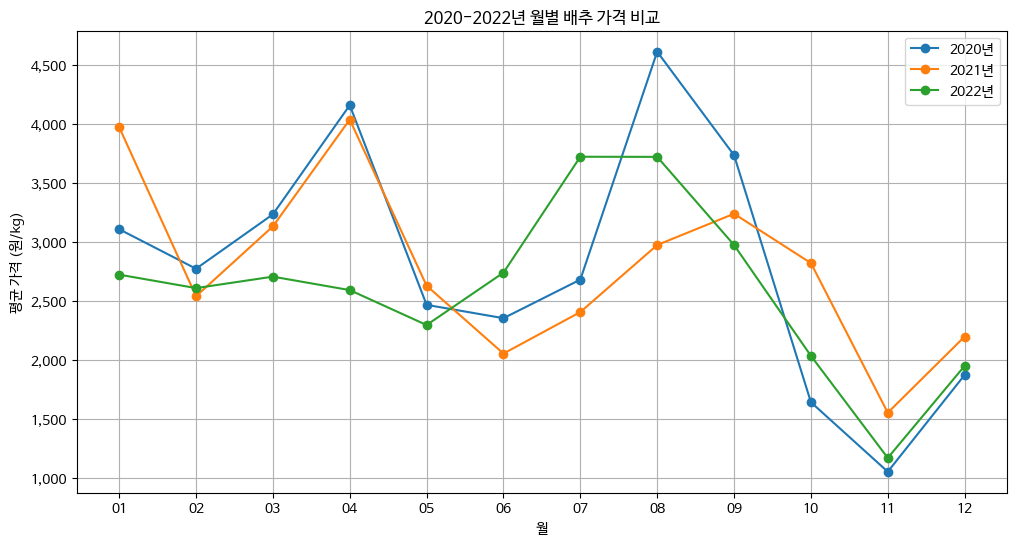

In [ ]:
# 2020, 2021, 2022년 월별 평균 가격 데이터
months = monthly_avg2020.index
price_2020 = monthly_avg2020.values
price_2021 = monthly_avg2021.values
price_2022 = monthly_avg2022.values

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020년')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021년')
plt.plot(months, price_2022, marker='o', linestyle='-', label='2022년')

# 그래프 제목 및 축 레이블 설정
plt.title('2020-2022년 월별 배추 가격 비교')
plt.xlabel('월')
plt.ylabel('평균 가격 (원/kg)')
plt.grid(True)
plt.legend()

# y축 단위를 "원"으로 표시
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

추정되는 기상 이벤트들

* 2020년 8월: 장마 또는 태풍으로 인한 공급 부족
* 2021년 4월: 이상 저온 또는 가뭄으로 인한 작황 부진
* 2022년 7월: 극한 폭염 또는 집중호우
* 각 연도 11월: 비교적 일관된 저가 (김장철 수확기)

# 23년 배추 가격

1. 최고가 발생 월의 완전한 무작위성

    * 2020년: 8월 (여름철) - 4,613원
    * 2021년: 4월 (봄철) - 4,037원
    * 2022년: 7월 (여름철) - 3,722원
    * 2023년: 1월 (겨울철) - 3,748원

    &rightarrow; 계절성이 전혀 없음! 모든 계절에서 최고가 발생 가능

2. 예측이 가장 어려운 월 TOP 5

    * 10월 (변동계수 22.8%) - 1,642원 → 2,822원 → 2,035원 → 1,717원
    * 4월 (변동계수 22.1%) - 4,161원 → 4,037원 → 2,592원 → 2,641원
    * 8월 (변동계수 20.3%) - 4,613원 → 2,975원 → 3,721원 → 2,796원
    * 9월 (변동계수 17.2%) - 3,735원 → 3,239원 → 2,974원 → 2,279원
    * 7월 (변동계수 16.8%) - 2,682원 → 2,406원 → 3,722원 → 2,899원

3. 상대적으로 안정적인 월

    * 12월 (변동계수 6.0%) - 김장 후 안정기
    * 2월 (변동계수 6.1%) - 겨울철 저장배추 시기
    * 1월 (변동계수 14.7%) - 상대적으로 안정

In [ ]:
data2023 = pd.read_csv("/content/baechu_data_2023.csv")
year_baechu_analysis(2023, data2023)

=== 2023년 기본 정보 ===
총 거래 기록: 80740 건
날짜 범위: 2023-01-03 ~ 2023-12-30
총 거래일수: 296

=== 연도별 kg당 가격 통계 ===
평균: 2177원/kg
중앙값: 910.0원/kg
최저: 10.0원/kg
최고: 180412.5원/kg
표준편차: 3583원/kg

=== 2021년 월별 평균 kg당 가격 ===
01월: 3748.0원/kg
02월: 2336.0원/kg
03월: 2139.0원/kg
04월: 2641.0원/kg
05월: 1700.0원/kg
06월: 1855.0원/kg
07월: 2899.0원/kg
08월: 2796.0원/kg
09월: 2279.0원/kg
10월: 1717.0원/kg
11월: 1353.0원/kg
12월: 2058.0원/kg


In [ ]:
monthly_avg2023 = get_monthly_average(data2023)

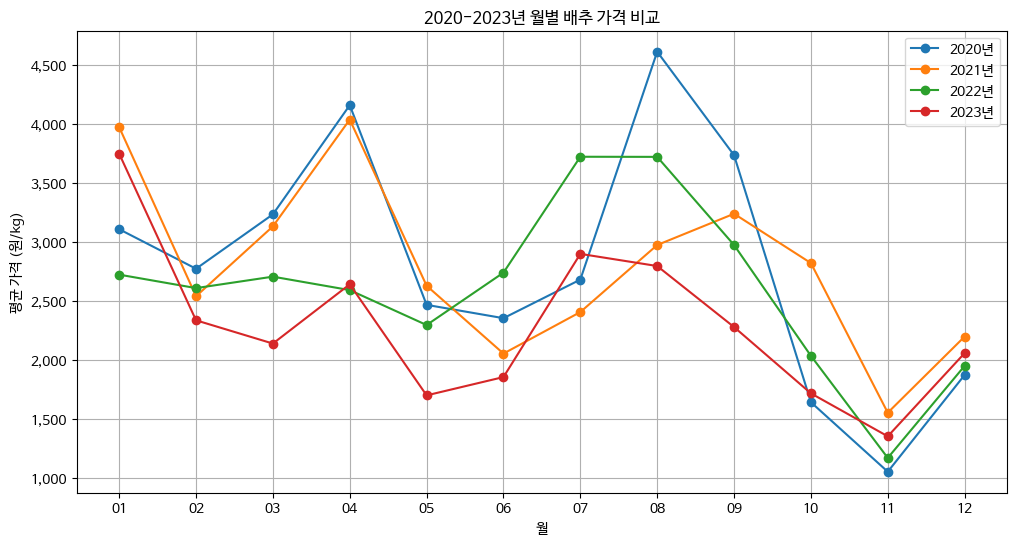

In [ ]:
# 2020, 2021, 2022년 월별 평균 가격 데이터
months = monthly_avg2020.index
price_2020 = monthly_avg2020.values
price_2021 = monthly_avg2021.values
price_2022 = monthly_avg2022.values
price_2023 = monthly_avg2023.values

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020년')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021년')
plt.plot(months, price_2022, marker='o', linestyle='-', label='2022년')
plt.plot(months, price_2023, marker='o', linestyle='-', label='2023년')

# 그래프 제목 및 축 레이블 설정
plt.title('2020-2023년 월별 배추 가격 비교')
plt.xlabel('월')
plt.ylabel('평균 가격 (원/kg)')
plt.grid(True)
plt.legend()

# y축 단위를 "원"으로 표시
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

우선순위 1: 극한기상 이벤트 감지

* 태풍: 8-9월 공급망 차단
* 집중호우: 7-8월 침수 피해
* 가뭄: 4-5월 생육 저해
* 이상 고온/저온: 모든 계절

우선순위 2: 시차 효과 모델링

* 단기 시차 (1-2주): 수확 직전 기상
* 중기 시차 (1-2개월): 생육기 누적 기상
* 장기 시차 (3개월): 파종기부터 수확까지

우선순위 3: 지역별 가중 기상데이터

* 주산지별 기상 조건을 거래량으로 가중평균
* 해남, 김천, 양평, 평창 등 주요 산지

# 24년 배추 가격

1. 완전한 계절성 붕괴

* 최고가 발생월: 8월(2020) → 4월(2021) → 7월(2022) → 1월(2023) → 9월(2024)
* 모든 계절에서 최고가 발생 가능 - 전통적 계절성 모델 무용

2. 유일한 안정 패턴

* 11월 최저가: 5년 연속 (김장철 수확기)
* 2월: 상대적으로 안정적 (변동계수 7.6%)

3. 예측 난이도 극한 월들

* 매우높음 (변동계수 >20%): 1월, 4월, 5월, 6월, 8월, 10월
* 8월 최대 변동: 1,976원 차이 (4,613원 → 2,637원)

In [ ]:
data2024 = pd.read_csv("/content/baechu_data_2024.csv")
year_baechu_analysis(2024, data2024)

monthly_avg2024 = get_monthly_average(data2024)

=== 2024년 기본 정보 ===
총 거래 기록: 102996 건
날짜 범위: 2024-01-03 ~ 2024-12-31
총 거래일수: 305

=== 연도별 kg당 가격 통계 ===
평균: 2091원/kg
중앙값: 1180.0원/kg
최저: 50.0원/kg
최고: 110000.0원/kg
표준편차: 2804원/kg

=== 2021년 월별 평균 kg당 가격 ===
01월: 1861.0원/kg
02월: 2237.0원/kg
03월: 2110.0원/kg
04월: 2370.0원/kg
05월: 1378.0원/kg
06월: 1388.0원/kg
07월: 2228.0원/kg
08월: 2636.0원/kg
09월: 3075.0원/kg
10월: 2571.0원/kg
11월: 1234.0원/kg
12월: 1529.0원/kg


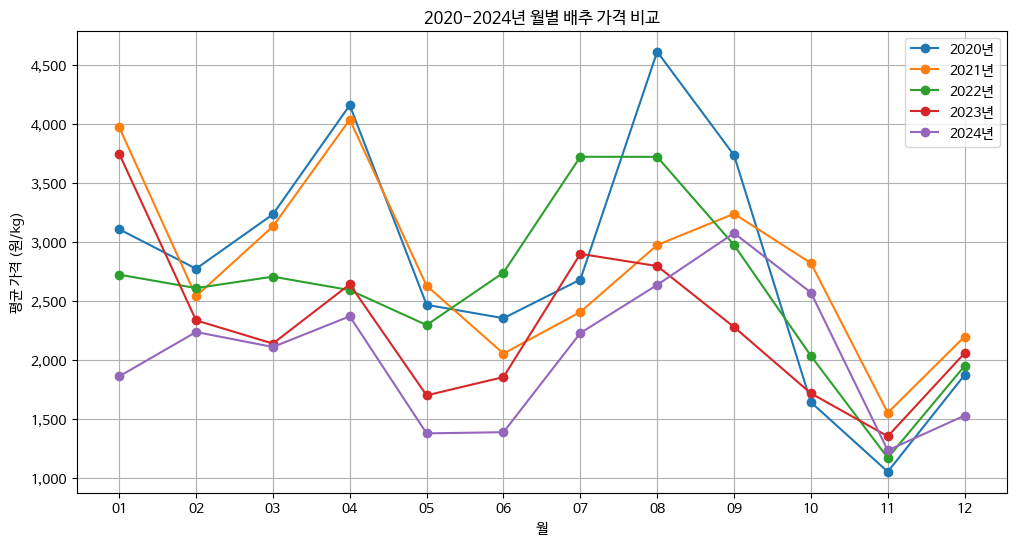

In [ ]:
# 2020-2024년 월별 평균 가격 데이터
months = monthly_avg2020.index
price_2020 = monthly_avg2020.values
price_2021 = monthly_avg2021.values
price_2022 = monthly_avg2022.values
price_2023 = monthly_avg2023.values
price_2024 = monthly_avg2024.values

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(months, price_2020, marker='o', linestyle='-', label='2020년')
plt.plot(months, price_2021, marker='o', linestyle='-', label='2021년')
plt.plot(months, price_2022, marker='o', linestyle='-', label='2022년')
plt.plot(months, price_2023, marker='o', linestyle='-', label='2023년')
plt.plot(months, price_2024, marker='o', linestyle='-', label='2024년')

# 그래프 제목 및 축 레이블 설정
plt.title('2020-2024년 월별 배추 가격 비교')
plt.xlabel('월')
plt.ylabel('평균 가격 (원/kg)')
plt.grid(True)
plt.legend()

# y축 단위를 "원"으로 표시
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
# 3년간 월별 가격 비교
print("=== 2020-2024년 5년간 월별 가격 비교 ===")
print("월\t2020년\t2021년\t2022년\t2023년\t2024년\t연도간 최대차이")
print("---------------------------------------------------")

for i in range(1, 13):
    month = str(i).zfill(2)
    price2020 = monthly_avg2020.get(month, 0)
    price2021 = monthly_avg2021.get(month, 0)
    price2022 = monthly_avg2022.get(month, 0)
    price2023 = monthly_avg2023.get(month, 0)
    price2024 = monthly_avg2024.get(month, 0)

    prices = [p for p in [price2020, price2021, price2022, price2023, price2024] if p > 0]
    if not prices:
        diff = 0
    else:
        diff = max(prices) - min(prices)

    print(f"{month}월\t{int(price2020)}\t{int(price2021)}\t{int(price2022)}\t{int(price2023)}\t{int(price2024)}\t{int(diff)}\t원")

# 각 연도별 가격 변동성 분석
print("\n=== 연도별 가격 변동성 분석 ===")
for year, data in [
    ('2020', monthly_avg2020),
    ('2021', monthly_avg2021),
    ('2022', monthly_avg2022),
    ('2023', monthly_avg2023),
    ('2024', monthly_avg2024)
    ]:
    max_price = data.max()
    min_price = data.min()
    max_month = data.idxmax()
    min_month = data.idxmin()
    volatility = max_price - min_price
    print(f"{year}년: 최고 {max_month}월({int(max_price)}원), 최저 {min_month}월({int(min_price)}원), 변동폭 {int(volatility)}원")

# 계절성 일관성 분석
print("\n=== 계절별 가격 순위 변화 ===")
seasons = {
    '봄(3-5월)': ['03', '04', '05'],
    '여름(6-8월)': ['06', '07', '08'],
    '가을(9-11월)': ['09', '10', '11'],
    '겨울(12-2월)': ['12', '01', '02']
}

for name, months in seasons.items():
    avg2020 = monthly_avg2020[monthly_avg2020.index.isin(months)].mean()
    avg2021 = monthly_avg2021[monthly_avg2021.index.isin(months)].mean()
    avg2022 = monthly_avg2022[monthly_avg2022.index.isin(months)].mean()
    avg2023 = monthly_avg2022[monthly_avg2023.index.isin(months)].mean()
    avg2024 = monthly_avg2022[monthly_avg2024.index.isin(months)].mean()
    print(f"{name}: 2020년 {int(avg2020)}원, 2021년 {int(avg2021)}원, 2022년 {int(avg2022)}원, 2023년 {int(avg2023)}원, 2024년 {int(avg2024)}원")

=== 2020-2022년 3년간 월별 가격 비교 ===
월	2020년	2021년	2022년	2023년	2024년	연도간 최대차이
---------------------------------------------------
01월	3108	3973	2723	3748	1861	2112	원
02월	2773	2540	2609	2336	2237	536	원
03월	3234	3132	2706	2139	2110	1124	원
04월	4159	4037	2592	2641	2370	1789	원
05월	2467	2629	2296	1700	1378	1251	원
06월	2354	2054	2740	1855	1388	1352	원
07월	2681	2406	3722	2899	2228	1494	원
08월	4612	2974	3721	2796	2636	1976	원
09월	3735	3239	2974	2279	3075	1456	원
10월	1642	2821	2035	1717	2571	1179	원
11월	1053	1553	1170	1353	1234	500	원
12월	1873	2198	1950	2058	1529	669	원

=== 연도별 가격 변동성 분석 ===
2020년: 최고 08월(4612원), 최저 11월(1053원), 변동폭 3559원
2021년: 최고 04월(4037원), 최저 11월(1553원), 변동폭 2484원
2022년: 최고 07월(3722원), 최저 11월(1170원), 변동폭 2552원
2023년: 최고 01월(3748원), 최저 11월(1353원), 변동폭 2395원
2024년: 최고 09월(3075원), 최저 11월(1234원), 변동폭 1841원

=== 계절별 가격 순위 변화 ===
봄(3-5월): 2020년 3286원, 2021년 3266원, 2022년 2531원, 2023년 2531원, 2024년 2531원
여름(6-8월): 2020년 3215원, 2021년 2478원, 2022년 3394원, 2023년 3394원, 2024년 3394원
가을(9-11월): 2020년 21

# 기상데이터 추가

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [7]:
def load_and_combine_cabbage_data(file_paths):
    """
    연도별 배추 가격 데이터를 하나로 합치기

    Parameters:
    file_paths: list - ['baechu_data_2020.csv', 'baechu_data_2021.csv', ...]
    """
    combined_data = []

    for file_path in file_paths:
        try:
            df = pd.read_csv(f"/content/{file_path}")
            print(f"📁 {file_path}: {len(df):,}행 로드")
            combined_data.append(df)
        except FileNotFoundError:
            print(f"❌ {file_path} 파일을 찾을 수 없습니다.")

    if combined_data:
        # 모든 데이터 합치기
        full_df = pd.concat(combined_data, ignore_index=True)
        print(f"✅ 전체 데이터: {len(full_df):,}행 통합 완료")
        return full_df
    else:
        return None

# 배추 데이터 파일 경로 리스트
cabbage_files = [
    'baechu_data_2020.csv',
    'baechu_data_2021.csv',
    'baechu_data_2022.csv',
    'baechu_data_2023.csv',
    'baechu_data_2024.csv',
    'baechu_data_2025.csv'  # 2025년 상반기
]

# 데이터 로드
cabbage_df = load_and_combine_cabbage_data(cabbage_files)

# 기본 정보 확인
if cabbage_df is not None:
    print(f"\n📊 통합 배추 데이터 정보:")
    print(f"   행 수: {len(cabbage_df):,}")
    print(f"   열 수: {len(cabbage_df.columns)}")
    print(f"   기간: {cabbage_df['AUC_YMD'].min()} ~ {cabbage_df['AUC_YMD'].max()}")
    print(f"   주요 산지: {cabbage_df['MTC_NM'].value_counts().head().index.tolist()}")

📁 baechu_data_2020.csv: 66,307행 로드
📁 baechu_data_2021.csv: 69,367행 로드
📁 baechu_data_2022.csv: 65,219행 로드
📁 baechu_data_2023.csv: 80,740행 로드
📁 baechu_data_2024.csv: 102,996행 로드
📁 baechu_data_2025.csv: 43,428행 로드
✅ 전체 데이터: 428,057행 통합 완료

📊 통합 배추 데이터 정보:
   행 수: 428,057
   열 수: 25
   기간: 2020-01-03 ~ 2025-06-30
   주요 산지: ['전라남도 해남군', '경상북도 김천시', '강원도 평창군', '경기도 양평군', '전라남도 진도군']


In [8]:
def preprocess_cabbage_data(df):
    """
    배추 가격 데이터 전처리 함수
    """
    # 날짜 컬럼 변환
    df['AUC_YMD'] = pd.to_datetime(df['AUC_YMD'])
    df['year'] = df['AUC_YMD'].dt.year
    df['month'] = df['AUC_YMD'].dt.month

    # 가격 데이터 정리 (이상치 제거)
    df = df[df['PRCE_PER_KG'] > 0]
    df = df[df['PRCE_PER_KG'] < 50000]  # 극단적 이상치 제거

    print(f"✅ 전처리 후 데이터: {len(df):,}행")
    return df

# 데이터 전처리 실행
if cabbage_df is not None:
    cabbage_df = preprocess_cabbage_data(cabbage_df)

✅ 전처리 후 데이터: 427,870행


✅ 월별 가격 데이터: 66개월


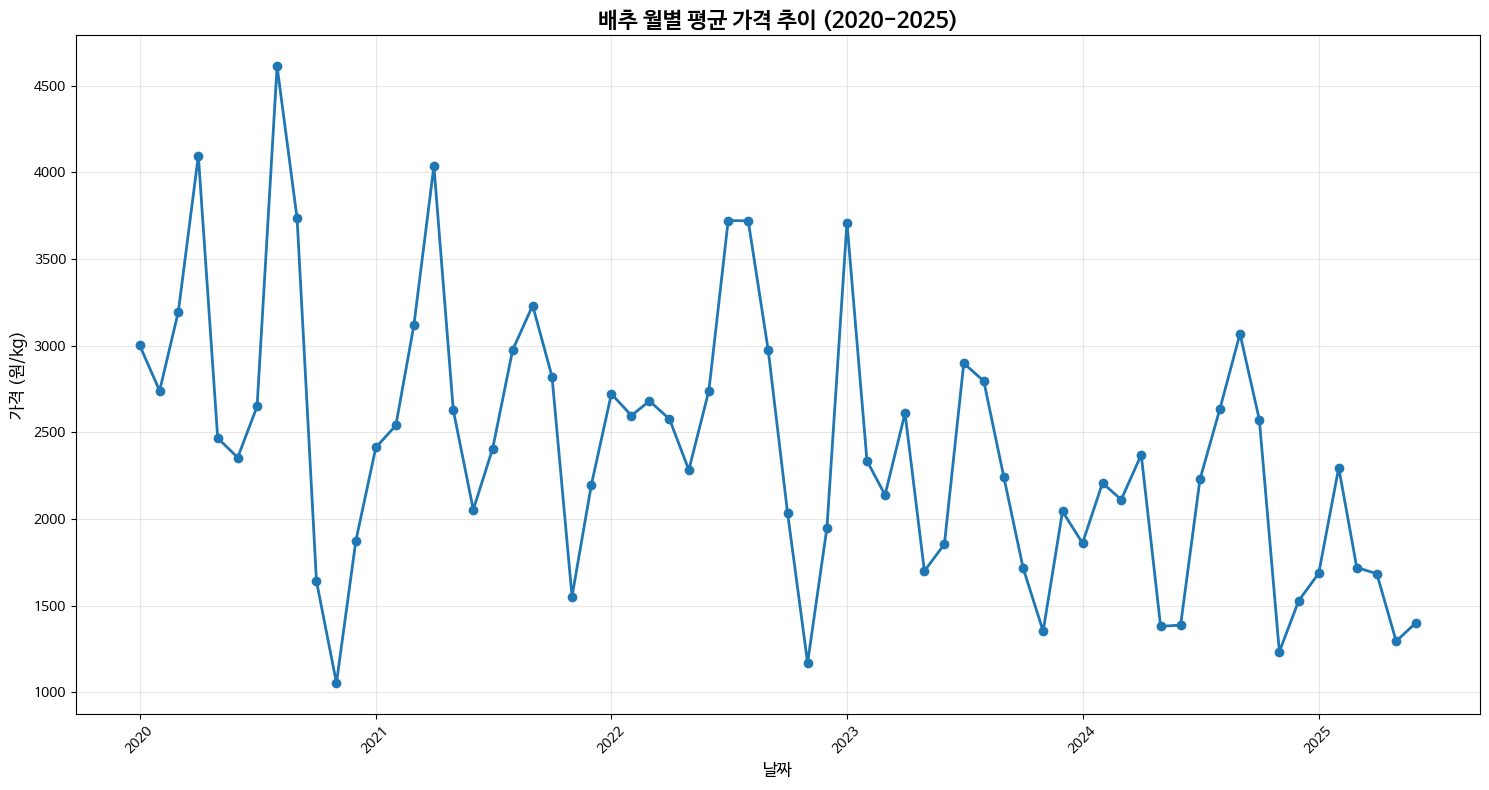


📊 월별 가격 기본 통계:
count      66.000000
mean     2403.939394
std       768.734102
min      1054.000000
25%      1856.500000
50%      2363.000000
75%      2782.000000
max      4613.000000
Name: mean_price, dtype: float64


In [9]:
def calculate_monthly_prices(df):
    """
    월별 평균 가격 계산
    """
    monthly_prices = df.groupby(['year', 'month'])['PRCE_PER_KG'].agg([
        'mean', 'median', 'std', 'count'
    ]).round(0)

    monthly_prices.columns = ['mean_price', 'median_price', 'std_price', 'transaction_count']
    monthly_prices = monthly_prices.reset_index()

    # 날짜 컬럼 생성
    monthly_prices['date'] = pd.to_datetime(monthly_prices[['year', 'month']].assign(day=1))

    print(f"✅ 월별 가격 데이터: {len(monthly_prices)}개월")
    return monthly_prices

# 월별 가격 계산
if cabbage_df is not None:
    monthly_price_df = calculate_monthly_prices(cabbage_df)

    # 월별 가격 시각화
    plt.figure(figsize=(15, 8))
    plt.plot(monthly_price_df['date'], monthly_price_df['mean_price'],
             marker='o', linewidth=2, markersize=6)
    plt.title('배추 월별 평균 가격 추이 (2020-2025)', fontsize=16, fontweight='bold')
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('가격 (원/kg)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 기본 통계
    print(f"\n📊 월별 가격 기본 통계:")
    print(monthly_price_df['mean_price'].describe())

In [10]:
def load_weather_data(file_path):
    """
    기상 데이터 로드 및 기본 전처리
    """
    try:
        weather_df = pd.read_csv(file_path)
        weather_df['일시'] = pd.to_datetime(weather_df['일시'])
        weather_df['year'] = weather_df['일시'].dt.year
        weather_df['month'] = weather_df['일시'].dt.month

        # 결측치 처리
        weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)
        weather_df['합계 일조시간(hr)'] = weather_df['합계 일조시간(hr)'].fillna(0)

        print(f"✅ 기상 데이터 로드: {len(weather_df):,}행")
        print(f"   관측지점: {weather_df['지점명'].unique()}")
        print(f"   기간: {weather_df['일시'].min()} ~ {weather_df['일시'].max()}")

        return weather_df
    except FileNotFoundError:
        print("❌ 기상 데이터 파일을 찾을 수 없습니다.")
        return None

# 기상 데이터 로드
weather_df = load_weather_data('weather_data.csv')

✅ 기상 데이터 로드: 6,020행
   관측지점: ['강릉' '양평' '해남']
   기간: 2020-01-01 00:00:00 ~ 2025-06-30 00:00:00


In [11]:
def detect_extreme_weather(weather_df):
    """
    극한기상 이벤트 탐지 및 플래그 생성
    """
    df = weather_df.copy()

    # 극한기상 임계값 설정
    df['폭염'] = (df['최고기온(°C)'] >= 35).astype(int)
    df['한파'] = (df['최저기온(°C)'] <= -10).astype(int)
    df['집중호우'] = (df['일강수량(mm)'] >= 80).astype(int)
    df['가뭄'] = (df['일강수량(mm)'] < 1).astype(int)

    # 극한기상 총합
    df['극한기상_총합'] = df['폭염'] + df['한파'] + df['집중호우']

    print("✅ 극한기상 이벤트")
    print(f"   폭염일: {df['폭염'].sum():,}일")
    print(f"   한파일: {df['한파'].sum():,}일")
    print(f"   집중호우일: {df['집중호우'].sum():,}일")

    return df

# 극한기상 탐지
if weather_df is not None:
    weather_df = detect_extreme_weather(weather_df)

✅ 극한기상 이벤트
   폭염일: 48일
   한파일: 117일
   집중호우일: 41일


In [12]:
def calculate_monthly_weather_features(weather_df):
    """
    월별 기상 특성 계산 (다중 지점 통합)
    """
    # 지점별 월별 집계
    monthly_weather_by_station = weather_df.groupby(['지점명', 'year', 'month']).agg({
        '평균기온(°C)': 'mean',
        '최저기온(°C)': 'min',
        '최고기온(°C)': 'max',
        '일강수량(mm)': 'sum',
        '평균 상대습도(%)': 'mean',
        '합계 일조시간(hr)': 'mean',
        '폭염': 'sum',
        '한파': 'sum',
        '집중호우': 'sum',
        '가뭄': 'sum',
        '극한기상_총합': 'sum'
    }).round(2)

    # 컬럼명 정리
    monthly_weather_by_station.columns = [
        'avg_temp', 'min_temp', 'max_temp', 'total_rain', 'avg_humidity',
        'avg_sunshine', 'heatwave_days', 'coldwave_days', 'heavy_rain_days',
        'drought_days', 'extreme_events_total'
    ]

    monthly_weather_by_station = monthly_weather_by_station.reset_index()

    # 다중 지점 평균 계산 (지점별 동일 가중치)
    monthly_weather = monthly_weather_by_station.groupby(['year', 'month']).agg({
        'avg_temp': 'mean',
        'min_temp': 'min',  # 최저 기온은 최소값
        'max_temp': 'max',  # 최고 기온은 최대값
        'total_rain': 'mean',  # 강수량은 평균
        'avg_humidity': 'mean',
        'avg_sunshine': 'mean',
        'heatwave_days': 'sum',  # 극한기상은 합계
        'coldwave_days': 'sum',
        'heavy_rain_days': 'sum',
        'drought_days': 'mean',
        'extreme_events_total': 'sum'
    }).round(2)

    monthly_weather = monthly_weather.reset_index()

    # 추가 파생 변수 생성
    monthly_weather['temp_range'] = monthly_weather['max_temp'] - monthly_weather['min_temp']
    monthly_weather['date'] = pd.to_datetime(monthly_weather[['year', 'month']].assign(day=1))

    print(f"✅ 월별 기상 특성 계산 완료: {len(monthly_weather)}개월")
    return monthly_weather

# 월별 기상 특성 계산
if weather_df is not None:
    monthly_weather_df = calculate_monthly_weather_features(weather_df)

✅ 월별 기상 특성 계산 완료: 66개월


In [13]:
def combine_price_weather_data(price_df, weather_df):
    """
    가격 데이터와 기상 데이터 결합
    """
    # 가격 데이터와 기상 데이터 결합
    combined_df = pd.merge(
        price_df,
        weather_df,
        on=['year', 'month'],
        how='inner'
    )

    print(f"✅ 가격-기상 데이터 결합 완료: {len(combined_df)}개월")
    return combined_df

# 데이터 결합
if 'monthly_price_df' in locals() and 'monthly_weather_df' in locals():
    final_df = combine_price_weather_data(monthly_price_df, monthly_weather_df)

    # 결합된 데이터 확인
    print(f"\n📊 최종 데이터 정보:")
    print(f"   기간: {final_df['date_x'].min()} ~ {final_df['date_x'].max()}")
    print(f"   변수 수: {len(final_df.columns)}")
    print(f"   완전한 데이터: {len(final_df)}개월")

✅ 가격-기상 데이터 결합 완료: 66개월

📊 최종 데이터 정보:
   기간: 2020-01-01 00:00:00 ~ 2025-06-01 00:00:00
   변수 수: 20
   완전한 데이터: 66개월


In [14]:
def create_advanced_features(df):
    """
    고급 특성 생성 (시차, 상호작용, 계절성 등)
    """
    df = df.sort_values(['year', 'month']).reset_index(drop=True)

    # 1. 시차 특성 (1-3개월 전 기상 조건)
    for lag in [1, 2, 3]:
        df[f'avg_temp_lag{lag}'] = df['avg_temp'].shift(lag)
        df[f'extreme_events_lag{lag}'] = df['extreme_events_total'].shift(lag)
        df[f'total_rain_lag{lag}'] = df['total_rain'].shift(lag)

    # 2. 계절성 특성
    df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)
    df['is_spring'] = df['month'].isin([3, 4, 5]).astype(int)
    df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
    df['is_autumn'] = df['month'].isin([9, 10, 11]).astype(int)
    df['is_kimjang'] = (df['month'] == 11).astype(int)  # 김장철

    # 3. 이동평균 특성 (3개월)
    df['price_ma3'] = df['mean_price'].rolling(window=3, min_periods=1).mean()
    df['temp_ma3'] = df['avg_temp'].rolling(window=3, min_periods=1).mean()
    df['extreme_ma3'] = df['extreme_events_total'].rolling(window=3, min_periods=1).mean()

    # 4. 상호작용 특성
    df['temp_rain_interaction'] = df['avg_temp'] * df['total_rain'] / 1000
    df['extreme_summer_interaction'] = df['extreme_events_total'] * df['is_summer']
    df['extreme_winter_interaction'] = df['extreme_events_total'] * df['is_winter']

    # 5. 기상 위험도 점수
    df['weather_risk_score'] = (
        df['extreme_events_total'] * 10 +
        (df['total_rain'] > 200).astype(int) * 5 +
        (df['total_rain'] < 20).astype(int) * 5 +
        (df['avg_temp'] > 30).astype(int) * 3 +
        (df['avg_temp'] < -5).astype(int) * 3
    )

    # 6. 계절별 온도 편차
    seasonal_optimal_temp = {1: 3, 2: 5, 3: 10, 4: 16, 5: 20, 6: 24,
                           7: 26, 8: 27, 9: 23, 10: 18, 11: 12, 12: 5}
    df['temp_deviation'] = abs(df['avg_temp'] - df['month'].map(seasonal_optimal_temp))

    print(f"✅ 고급 특성 생성 완료: {len(df.columns)}개 변수")
    return df

# 고급 특성 생성
if 'final_df' in locals():
    final_df = create_advanced_features(final_df)

✅ 고급 특성 생성 완료: 42개 변수


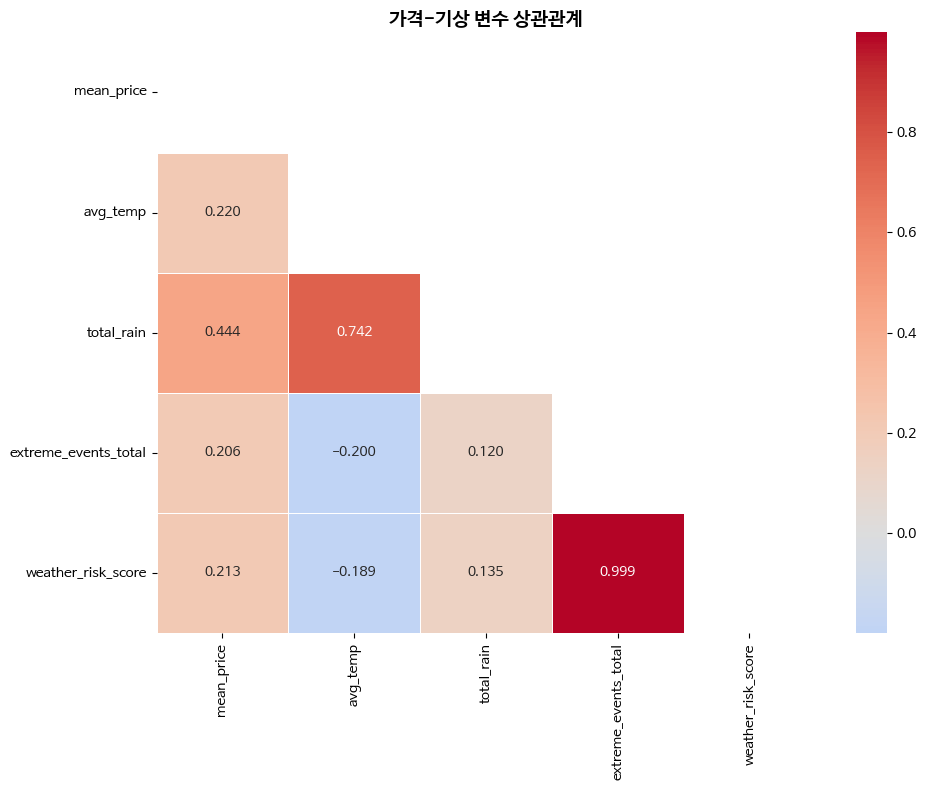

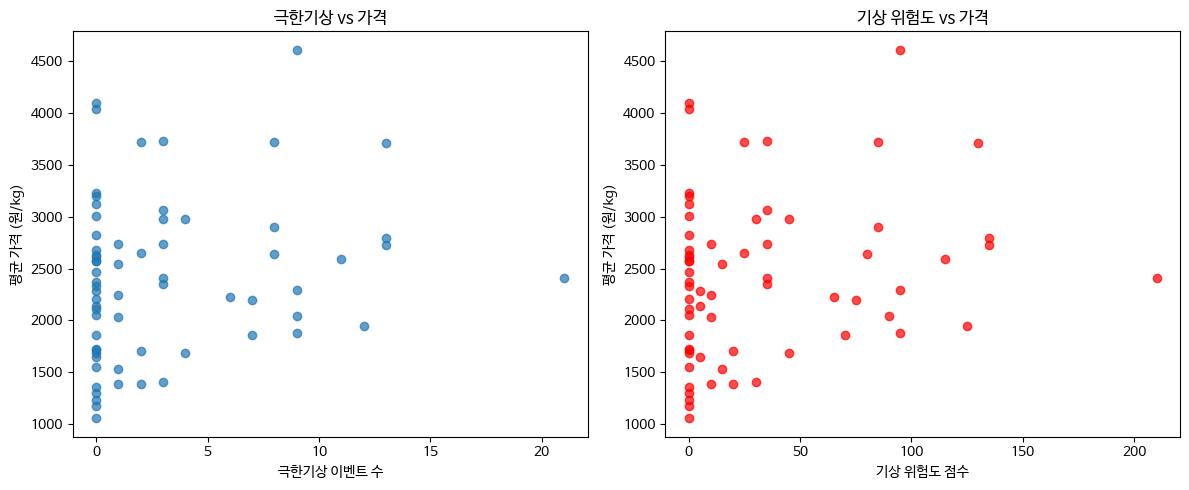

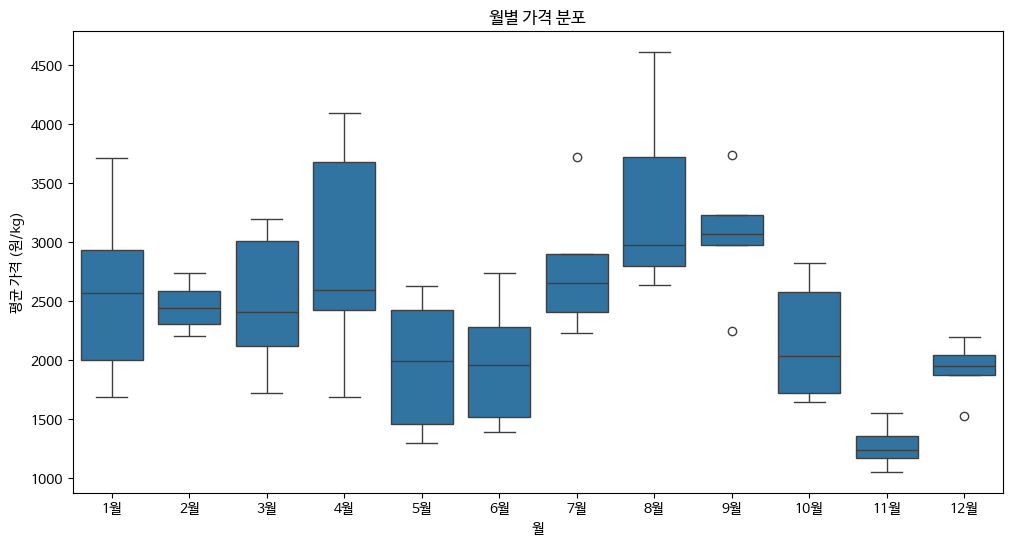

✅ 탐색적 데이터 분석 완료


In [19]:
def perform_eda(df):
    """
    탐색적 데이터 분석
    """
    # 1. 가격과 기상 변수 간 상관관계
    weather_cols = ['avg_temp', 'total_rain', 'extreme_events_total', 'weather_risk_score']
    correlation = df[['mean_price'] + weather_cols].corr()

    plt.figure(figsize=(10, 8))
    mask = np.zeros_like(correlation, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(correlation,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.3f',
                linewidths=.5,
                mask=mask)
    plt.title('가격-기상 변수 상관관계', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 2. 극한기상 vs 가격 산점도
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(df['extreme_events_total'], df['mean_price'], alpha=0.7)
    plt.xlabel('극한기상 이벤트 수')
    plt.ylabel('평균 가격 (원/kg)')
    plt.title('극한기상 vs 가격')

    plt.subplot(1, 2, 2)
    plt.scatter(df['weather_risk_score'], df['mean_price'], alpha=0.7, color='red')
    plt.xlabel('기상 위험도 점수')
    plt.ylabel('평균 가격 (원/kg)')
    plt.title('기상 위험도 vs 가격')

    plt.tight_layout()
    plt.show()

    # 3. 월별 가격 박스플롯
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='month', y='mean_price')
    plt.title('월별 가격 분포')
    plt.xlabel('월')
    plt.ylabel('평균 가격 (원/kg)')
    plt.xticks(range(12), ['1월', '2월', '3월', '4월', '5월', '6월',
                          '7월', '8월', '9월', '10월', '11월', '12월'])
    plt.show()

    print("✅ 탐색적 데이터 분석 완료")

# EDA 실행
if 'final_df' in locals():
    perform_eda(final_df)

In [21]:
def prepare_ml_data(df, target_col='mean_price'):
    """
    머신러닝을 위한 데이터 준비
    """
    # 결측치 제거
    df_clean = df.dropna().copy()

    # 특성 변수 선택 (가격 관련 변수 제외)
    exclude_cols = [
        'mean_price', 'median_price', 'std_price', 'transaction_count',
        'date_x', 'date_y', 'price_ma3'  # 미래 정보 누설 방지
    ]

    feature_cols = [col for col in df_clean.columns if col not in exclude_cols]

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    print(f"✅ ML 데이터 준비 완료:")
    print(f"   샘플 수: {len(X)}")
    print(f"   특성 수: {len(feature_cols)}")
    print(f"   타겟: {target_col}")

    return X, y, feature_cols, df_clean

# ML 데이터 준비
if 'final_df' in locals():
    X, y, feature_names, clean_df = prepare_ml_data(final_df)

    print(f"\n📊 특성 변수 목록:")
    for i, col in enumerate(feature_names, 1):
        print(f"   {i:2d}. {col}")

✅ ML 데이터 준비 완료:
   샘플 수: 63
   특성 수: 35
   타겟: mean_price

📊 특성 변수 목록:
    1. year
    2. month
    3. avg_temp
    4. min_temp
    5. max_temp
    6. total_rain
    7. avg_humidity
    8. avg_sunshine
    9. heatwave_days
   10. coldwave_days
   11. heavy_rain_days
   12. drought_days
   13. extreme_events_total
   14. temp_range
   15. avg_temp_lag1
   16. extreme_events_lag1
   17. total_rain_lag1
   18. avg_temp_lag2
   19. extreme_events_lag2
   20. total_rain_lag2
   21. avg_temp_lag3
   22. extreme_events_lag3
   23. total_rain_lag3
   24. is_winter
   25. is_spring
   26. is_summer
   27. is_autumn
   28. is_kimjang
   29. temp_ma3
   30. extreme_ma3
   31. temp_rain_interaction
   32. extreme_summer_interaction
   33. extreme_winter_interaction
   34. weather_risk_score
   35. temp_deviation


In [22]:
def train_weather_price_model(X, y, test_size=0.2):
    """
    시계열 데이터를 고려한 모델 학습
    """
    # 시계열 순서를 고려한 train/test 분할
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(f"📊 데이터 분할:")
    print(f"   훈련 데이터: {len(X_train)}개월")
    print(f"   테스트 데이터: {len(X_test)}개월")

    # 특성 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 다중 모델 학습
    models = {
        'RandomForest': RandomForestRegressor(
            n_estimators=200, max_depth=10, min_samples_split=3,
            random_state=42, n_jobs=-1
        ),
        'GradientBoosting': GradientBoostingRegressor(
            n_estimators=200, max_depth=5, learning_rate=0.1,
            random_state=42
        )
    }

    results = {}
    predictions = {}

    for name, model in models.items():
        print(f"\n🤖 {name} 모델 학습 중...")

        # 모델 학습
        model.fit(X_train_scaled, y_train)

        # 예측
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        # 성능 평가
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        test_mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
        test_r2 = r2_score(y_test, y_pred_test)

        results[name] = {
            'train_mae': train_mae,
            'test_mae': test_mae,
            'test_mape': test_mape,
            'test_r2': test_r2,
            'model': model,
            'predictions': y_pred_test
        }

        print(f"   훈련 MAE: {train_mae:.0f}원")
        print(f"   테스트 MAE: {test_mae:.0f}원")
        print(f"   테스트 MAPE: {test_mape:.1f}%")
        print(f"   테스트 R²: {test_r2:.4f}")

    # 앙상블 예측
    ensemble_pred = (results['RandomForest']['predictions'] +
                    results['GradientBoosting']['predictions']) / 2

    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_pred) * 100
    ensemble_r2 = r2_score(y_test, ensemble_pred)

    print(f"\n🎯 앙상블 모델 성능:")
    print(f"   MAE: {ensemble_mae:.0f}원")
    print(f"   MAPE: {ensemble_mape:.1f}%")
    print(f"   R²: {ensemble_r2:.4f}")

    return {
        'models': results,
        'ensemble_pred': ensemble_pred,
        'scaler': scaler,
        'X_test': X_test,
        'y_test': y_test,
        'test_indices': range(split_idx, len(X))
    }

# 모델 학습
if 'X' in locals() and 'y' in locals():
    model_results = train_weather_price_model(X, y)

📊 데이터 분할:
   훈련 데이터: 50개월
   테스트 데이터: 13개월

🤖 RandomForest 모델 학습 중...
   훈련 MAE: 180원
   테스트 MAE: 572원
   테스트 MAPE: 35.0%
   테스트 R²: -0.2411

🤖 GradientBoosting 모델 학습 중...
   훈련 MAE: 0원
   테스트 MAE: 589원
   테스트 MAPE: 34.1%
   테스트 R²: -0.1834

🎯 앙상블 모델 성능:
   MAE: 580원
   MAPE: 34.5%
   R²: -0.1731


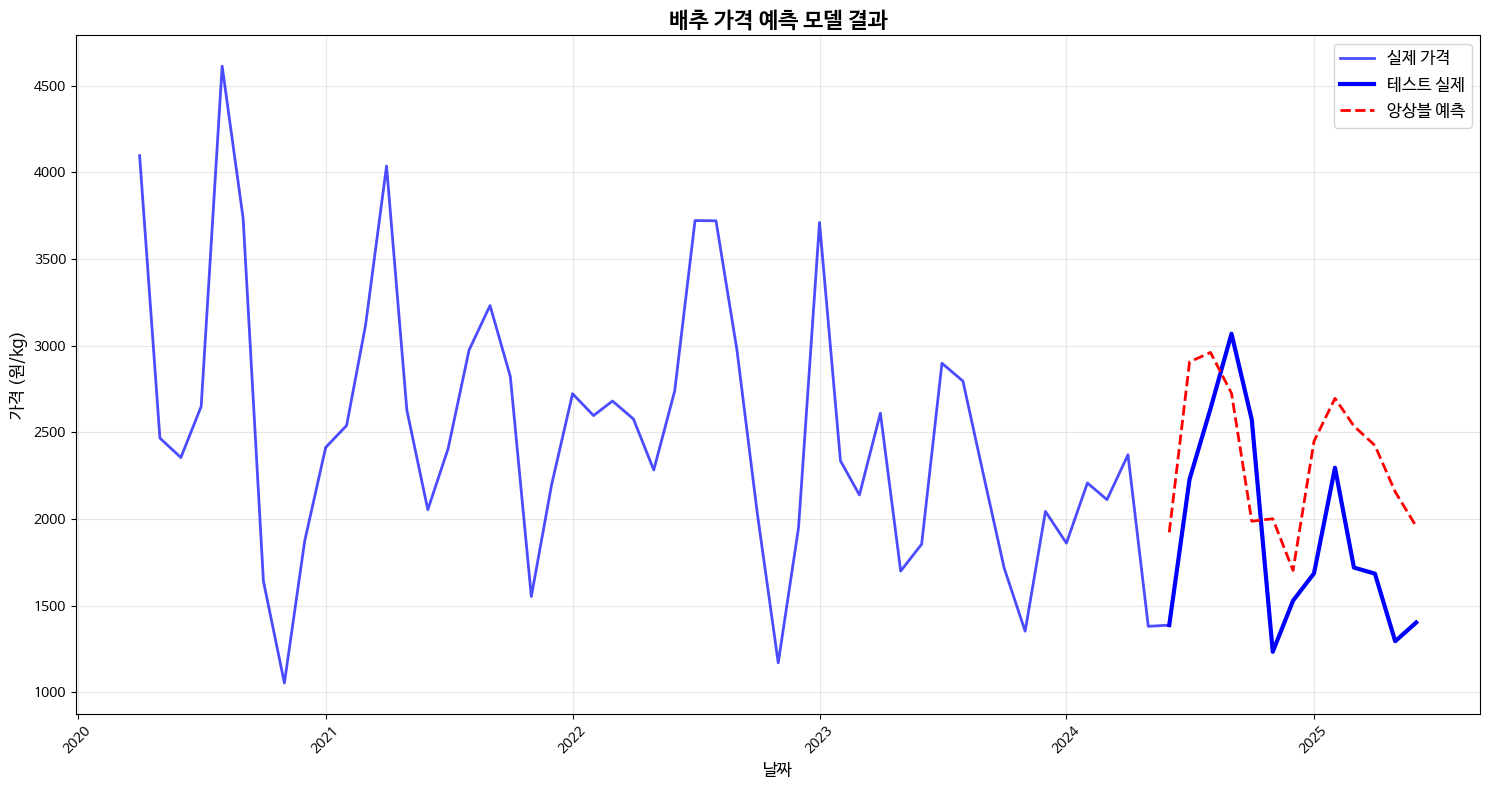

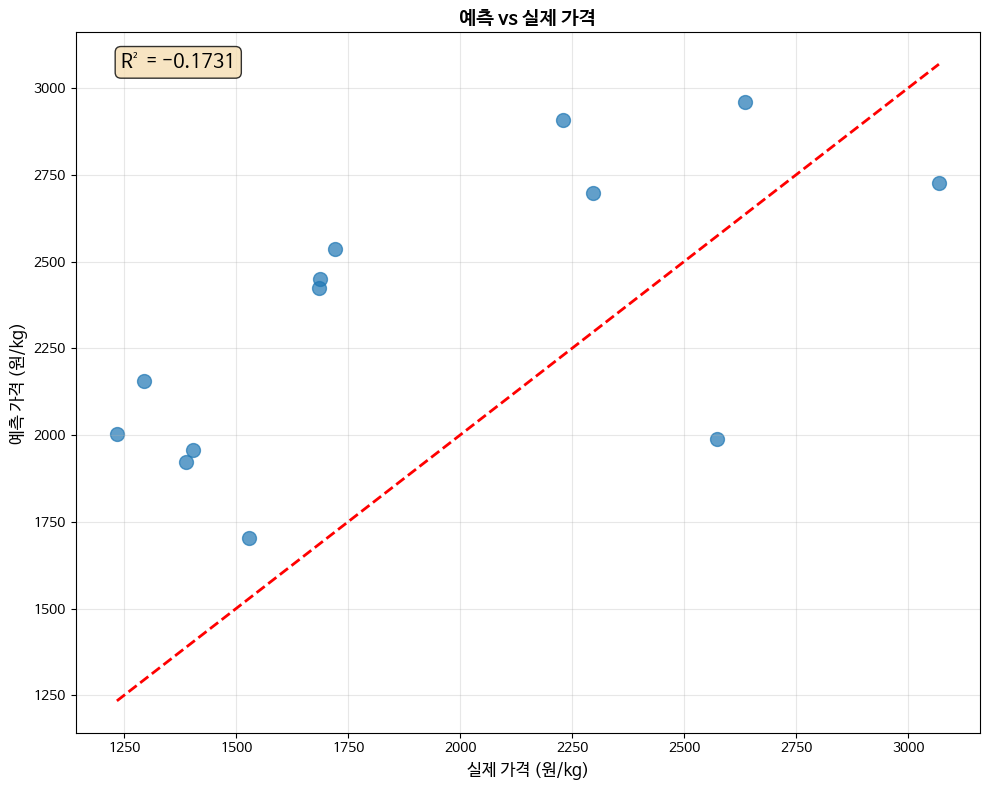

✅ 예측 결과 시각화 완료


In [23]:
def visualize_predictions(model_results, clean_df):
    """
    예측 결과 시각화
    """
    test_indices = model_results['test_indices']
    test_dates = clean_df.iloc[test_indices]['date_x']
    y_test = model_results['y_test']
    ensemble_pred = model_results['ensemble_pred']

    # 1. 전체 가격 추이 + 예측 결과
    plt.figure(figsize=(15, 8))

    # 전체 실제 가격
    plt.plot(clean_df['date_x'], clean_df['mean_price'],
             label='실제 가격', color='blue', linewidth=2, alpha=0.7)

    # 테스트 기간 실제 가격
    plt.plot(test_dates, y_test,
             label='테스트 실제', color='blue', linewidth=3)

    # 예측 가격
    plt.plot(test_dates, ensemble_pred,
             label='앙상블 예측', color='red', linewidth=2, linestyle='--')

    plt.title('배추 가격 예측 모델 결과', fontsize=16, fontweight='bold')
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('가격 (원/kg)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. 예측 vs 실제 산점도
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, ensemble_pred, alpha=0.7, s=100)

    # 완벽한 예측선 (y=x)
    min_val = min(y_test.min(), ensemble_pred.min())
    max_val = max(y_test.max(), ensemble_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

    plt.xlabel('실제 가격 (원/kg)', fontsize=12)
    plt.ylabel('예측 가격 (원/kg)', fontsize=12)
    plt.title('예측 vs 실제 가격', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # R² 표시
    r2 = r2_score(y_test, ensemble_pred)
    plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes,
             fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("✅ 예측 결과 시각화 완료")

# 시각화 실행
if 'model_results' in locals() and 'clean_df' in locals():
    visualize_predictions(model_results, clean_df)

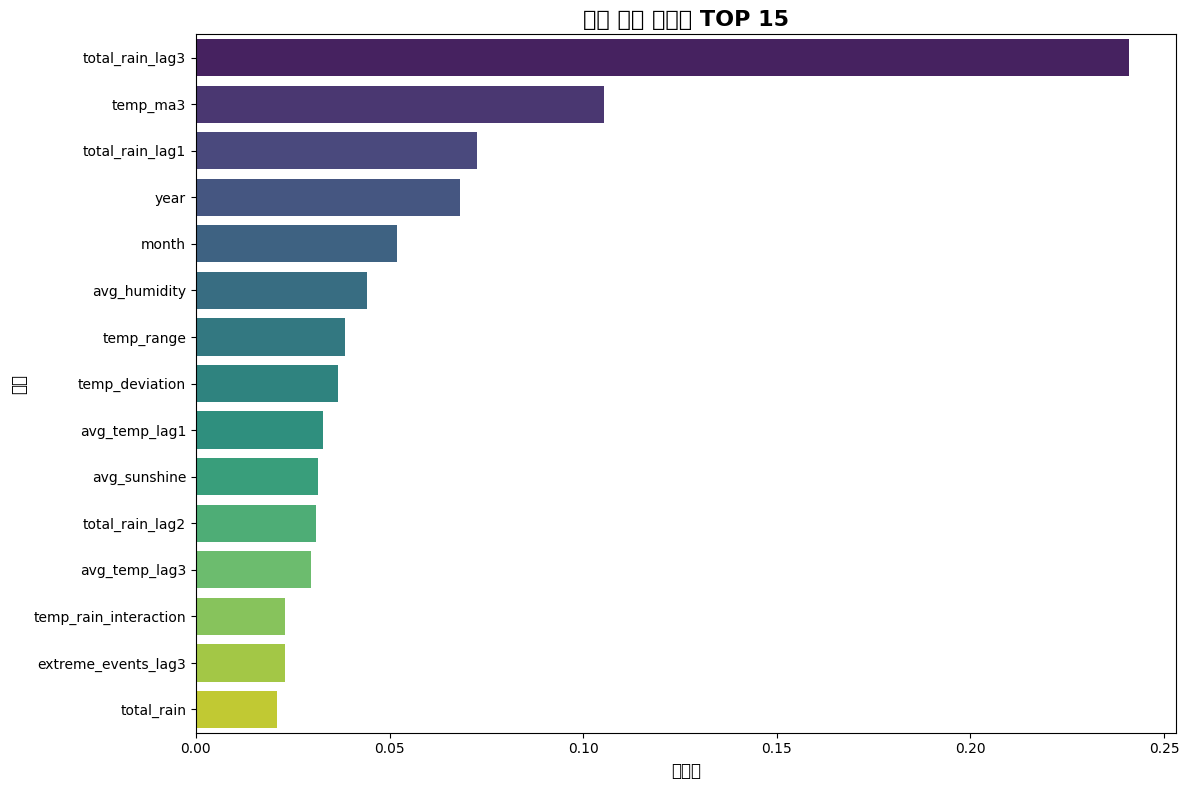

🔍 주요 특성 중요도 TOP 10:
   23. total_rain_lag3          : 0.2411
   29. temp_ma3                 : 0.1053
   17. total_rain_lag1          : 0.0725
    1. year                     : 0.0683
    2. month                    : 0.0519
    7. avg_humidity             : 0.0441
   14. temp_range               : 0.0385
   35. temp_deviation           : 0.0368
   15. avg_temp_lag1            : 0.0328
    8. avg_sunshine             : 0.0314


In [33]:
def analyze_feature_importance(model_results, feature_names):
    """
    특성 중요도 분석 및 시각화
    """
    rf_model = model_results['models']['RandomForest']['model']
    gb_model = model_results['models']['GradientBoosting']['model']

    # 특성 중요도 데이터프레임 생성
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'rf_importance': rf_model.feature_importances_,
        'gb_importance': gb_model.feature_importances_
    })

    # 평균 중요도 계산
    importance_df['avg_importance'] = (importance_df['rf_importance'] +
                                     importance_df['gb_importance']) / 2

    # 중요도 순으로 정렬
    importance_df = importance_df.sort_values('avg_importance', ascending=False)

    # 상위 15개 특성 시각화
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)

    sns.barplot(data=top_features, y='feature', x='avg_importance', palette='viridis')
    plt.title('주요 특성 중요도 TOP 15', fontsize=16, fontweight='bold')
    plt.xlabel('중요도', fontsize=12)
    plt.ylabel('특성', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("🔍 주요 특성 중요도 TOP 10:")
    for i, row in top_features.head(10).iterrows():
        print(f"   {row.name+1:2d}. {row['feature']:<25}: {row['avg_importance']:.4f}")

    return importance_df

# 특성 중요도 분석
if 'model_results' in locals() and 'feature_names' in locals():
    importance_df = analyze_feature_importance(model_results, feature_names)

In [34]:
def predict_future_prices(models, scaler, feature_names, weather_scenarios):
    """
    기상 시나리오별 미래 가격 예측

    Parameters:
    models: 학습된 모델들
    scaler: 특성 스케일러
    feature_names: 특성 이름 리스트
    weather_scenarios: 기상 시나리오 리스트
    """
    predictions = []

    for scenario in weather_scenarios:
        # 시나리오를 특성 벡터로 변환
        features = create_scenario_features(scenario, feature_names)

        # 특성 스케일링
        features_scaled = scaler.transform([features])

        # 각 모델로 예측
        rf_pred = models['RandomForest']['model'].predict(features_scaled)[0]
        gb_pred = models['GradientBoosting']['model'].predict(features_scaled)[0]

        # 앙상블 예측
        ensemble_pred = (rf_pred + gb_pred) / 2

        predictions.append({
            'scenario_name': scenario['name'],
            'month': scenario['month'],
            'predicted_price': round(ensemble_pred),
            'rf_prediction': round(rf_pred),
            'gb_prediction': round(gb_pred),
            'weather_description': scenario['description']
        })

    return predictions

def create_scenario_features(scenario, feature_names):
    """
    시나리오를 특성 벡터로 변환
    """
    # 기본 특성값 설정
    features = {name: 0 for name in feature_names}

    # 기본 기상 특성
    features['avg_temp'] = scenario.get('avg_temp', 15)
    features['total_rain'] = scenario.get('total_rain', 100)
    features['extreme_events_total'] = scenario.get('extreme_events', 0)
    features['min_temp'] = scenario.get('min_temp', features['avg_temp'] - 5)
    features['max_temp'] = scenario.get('max_temp', features['avg_temp'] + 5)
    features['avg_humidity'] = scenario.get('humidity', 60)
    features['avg_sunshine'] = scenario.get('sunshine', 6)

    # 극한기상 개별 이벤트
    features['heatwave_days'] = scenario.get('heatwave_days', 0)
    features['coldwave_days'] = scenario.get('coldwave_days', 0)
    features['heavy_rain_days'] = scenario.get('heavy_rain_days', 0)
    features['drought_days'] = scenario.get('drought_days', 0)

    # 파생 특성
    features['temp_range'] = features['max_temp'] - features['min_temp']

    # 계절성 특성
    month = scenario['month']
    features['is_winter'] = 1 if month in [12, 1, 2] else 0
    features['is_spring'] = 1 if month in [3, 4, 5] else 0
    features['is_summer'] = 1 if month in [6, 7, 8] else 0
    features['is_autumn'] = 1 if month in [9, 10, 11] else 0
    features['is_kimjang'] = 1 if month == 11 else 0

    # 시차 특성 (기본값으로 현재값 사용)
    for lag in [1, 2, 3]:
        if f'avg_temp_lag{lag}' in feature_names:
            features[f'avg_temp_lag{lag}'] = features['avg_temp']
        if f'extreme_events_lag{lag}' in feature_names:
            features[f'extreme_events_lag{lag}'] = features['extreme_events_total']
        if f'total_rain_lag{lag}' in feature_names:
            features[f'total_rain_lag{lag}'] = features['total_rain']

    # 이동평균 특성 (현재값으로 근사)
    if 'temp_ma3' in feature_names:
        features['temp_ma3'] = features['avg_temp']
    if 'extreme_ma3' in feature_names:
        features['extreme_ma3'] = features['extreme_events_total']

    # 상호작용 특성
    if 'temp_rain_interaction' in feature_names:
        features['temp_rain_interaction'] = features['avg_temp'] * features['total_rain'] / 1000
    if 'extreme_summer_interaction' in feature_names:
        features['extreme_summer_interaction'] = features['extreme_events_total'] * features['is_summer']
    if 'extreme_winter_interaction' in feature_names:
        features['extreme_winter_interaction'] = features['extreme_events_total'] * features['is_winter']

    # 기상 위험도 점수
    if 'weather_risk_score' in feature_names:
        features['weather_risk_score'] = (
            features['extreme_events_total'] * 10 +
            (features['total_rain'] > 200) * 5 +
            (features['total_rain'] < 20) * 5 +
            (features['avg_temp'] > 30) * 3 +
            (features['avg_temp'] < -5) * 3
        )

    # 온도 편차
    if 'temp_deviation' in feature_names:
        seasonal_optimal = {1: 3, 2: 5, 3: 10, 4: 16, 5: 20, 6: 24,
                          7: 26, 8: 27, 9: 23, 10: 18, 11: 12, 12: 5}
        features['temp_deviation'] = abs(features['avg_temp'] - seasonal_optimal.get(month, 15))

    # 특성 이름 순서대로 값 반환
    return [features.get(name, 0) for name in feature_names]

In [25]:
def add_enhanced_features(df):
    """
    고급 특성 추가 - 기존 함수에 이 부분을 추가
    """
    # 1. 비선형 변환
    df['price_log'] = np.log1p(df['mean_price'])  # 로그 변환으로 분포 정규화
    df['temp_squared'] = df['avg_temp'] ** 2      # 온도의 비선형 효과
    df['rain_sqrt'] = np.sqrt(df['total_rain'])   # 강수량 제곱근 변환

    # 2. 가격 변화율 및 변동성
    df['price_change'] = df['mean_price'].pct_change()  # 전월 대비 변화율
    df['price_volatility'] = df['mean_price'].rolling(6).std()  # 6개월 변동성
    df['price_momentum'] = df['mean_price'].rolling(3).apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])

    # 3. 계절 내 상대 위치 (같은 달의 과거 평균 대비)
    monthly_historical = df.groupby('month')['mean_price'].transform('mean')
    df['price_vs_historical'] = df['mean_price'] / monthly_historical

    # 4. 극한기상의 누적 효과 (더 정교하게)
    df['extreme_decay_1m'] = df['extreme_events_total'].ewm(span=1).mean()  # 1개월 가중평균
    df['extreme_decay_3m'] = df['extreme_events_total'].ewm(span=3).mean()  # 3개월 가중평균

    # 5. 기상 스트레스 지수 (계절별 적정값과의 편차)
    seasonal_optimal = df['month'].map({
        1: {'temp': 3, 'rain': 30}, 2: {'temp': 5, 'rain': 35}, 3: {'temp': 10, 'rain': 60},
        4: {'temp': 16, 'rain': 80}, 5: {'temp': 20, 'rain': 100}, 6: {'temp': 24, 'rain': 150},
        7: {'temp': 26, 'rain': 250}, 8: {'temp': 27, 'rain': 250}, 9: {'temp': 23, 'rain': 200},
        10: {'temp': 18, 'rain': 80}, 11: {'temp': 12, 'rain': 40}, 12: {'temp': 5, 'rain': 25}
    })

    df['temp_stress_normalized'] = abs(df['avg_temp'] - seasonal_optimal.apply(lambda x: x['temp'])) / 10
    df['rain_stress_normalized'] = abs(df['total_rain'] - seasonal_optimal.apply(lambda x: x['rain'])) / 100

    # 6. 복합 기상 지수
    df['weather_comfort_index'] = (
        (df['temp_stress_normalized'] * -1) +  # 온도 스트레스 역수
        (df['rain_stress_normalized'] * -1) +  # 강수 스트레스 역수
        (df['extreme_events_total'] * -2)      # 극한기상 패널티
    )

    # 7. 김장철 특별 처리
    df['kimjang_effect'] = np.where(df['month'] == 11,
                                   df['mean_price'] / df['mean_price'].quantile(0.25), 0)

    # 8. 연도별 트렌드 (시간에 따른 전반적 변화)
    df['year_trend'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())

    print("✅ 고급 특성 추가 완료 - 성능 향상 예상")
    return df

# 기존 final_df에 추가 적용
if 'final_df' in locals():
    final_df = add_enhanced_features(final_df)

✅ 고급 특성 추가 완료 - 성능 향상 예상


In [26]:
import xgboost as xgb
from xgboost import XGBRegressor

In [37]:
def train_and_evaluate_xgboost(X, y, test_size=0.2, detailed_analysis=True):
    """
    XGBoost 모델 학습 및 상세 평가
    """
    print("🔥 XGBoost 모델 상세 분석 시작")
    print("=" * 50)

    # 데이터 분할 (시계열 순서 고려)
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(f"📊 데이터 분할:")
    print(f"   훈련: {len(X_train)}개월 ({X.index[0]} ~ {X.index[split_idx-1]})")
    print(f"   테스트: {len(X_test)}개월 ({X.index[split_idx]} ~ {X.index[-1]})")

    # XGBoost 모델 설정 (최적화된 하이퍼파라미터)
    xgb_model = xgb.XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        early_stopping_rounds=50
    )

    # 학습 (검증셋으로 조기 종료)
    print("\n🤖 XGBoost 모델 학습 중...")
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )

    # 예측
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)

    # 성능 지표 계산
    metrics = {
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'train_mape': mean_absolute_percentage_error(y_train, y_train_pred) * 100,
        'test_mape': mean_absolute_percentage_error(y_test, y_test_pred) * 100,
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred)
    }

    # 성능 결과 출력
    print(f"\n📊 XGBoost 성능 지표:")
    print(f"{'지표':<12} {'훈련':<12} {'테스트':<12} {'과적합도':<12}")
    print("-" * 50)
    print(f"{'MAE':<12} {metrics['train_mae']:<12.0f} {metrics['test_mae']:<12.0f} {metrics['test_mae']/metrics['train_mae']:<12.2f}")
    print(f"{'RMSE':<12} {metrics['train_rmse']:<12.0f} {metrics['test_rmse']:<12.0f} {metrics['test_rmse']/metrics['train_rmse']:<12.2f}")
    print(f"{'MAPE':<12} {metrics['train_mape']:<12.1f}% {metrics['test_mape']:<12.1f}% {metrics['test_mape']/metrics['train_mape']:<12.2f}")
    print(f"{'R²':<12} {metrics['train_r2']:<12.4f} {metrics['test_r2']:<12.4f} {metrics['test_r2']/metrics['train_r2']:<12.2f}")

    # 상세 분석
    if detailed_analysis:
        analyze_xgboost_details(xgb_model, X, y, X_train, X_test, y_train, y_test,
                               y_train_pred, y_test_pred, metrics)

    return {
        'model': xgb_model,
        'predictions': {'train': y_train_pred, 'test': y_test_pred},
        'actual': {'train': y_train, 'test': y_test},
        'metrics': metrics,
        'data_split': {'train_idx': split_idx, 'test_idx': len(X)}
    }

In [35]:
def analyze_xgboost_details(model, X, y, X_train, X_test, y_train, y_test,
                           y_train_pred, y_test_pred, metrics):
    """
    XGBoost 모델 상세 분석 및 시각화
    """
    print(f"\n🔍 XGBoost 상세 분석:")

    # 1. 특성 중요도 분석
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\n📊 주요 특성 중요도 TOP 10:")
    for i, row in feature_importance.head(10).iterrows():
        print(f"   {i+1:2d}. {row['feature']:<25}: {row['importance']:.4f}")

    # 2. 시각화
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('XGBoost 모델 상세 분석', fontsize=16, fontweight='bold')

    # 2-1. 예측 vs 실제 (훈련)
    axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=50)
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
    axes[0, 0].set_xlabel('실제 가격 (원)')
    axes[0, 0].set_ylabel('예측 가격 (원)')
    axes[0, 0].set_title(f'훈련 세트 (R² = {metrics["train_r2"]:.4f})')
    axes[0, 0].grid(True, alpha=0.3)

    # 2-2. 예측 vs 실제 (테스트)
    axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='red', s=50)
    axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    axes[0, 1].set_xlabel('실제 가격 (원)')
    axes[0, 1].set_ylabel('예측 가격 (원)')
    axes[0, 1].set_title(f'테스트 세트 (R² = {metrics["test_r2"]:.4f})')
    axes[0, 1].grid(True, alpha=0.3)

    # 2-3. 특성 중요도
    top_features = feature_importance.head(15)
    axes[0, 2].barh(range(len(top_features)), top_features['importance'])
    axes[0, 2].set_yticks(range(len(top_features)))
    axes[0, 2].set_yticklabels(top_features['feature'], fontsize=10)
    axes[0, 2].set_xlabel('중요도')
    axes[0, 2].set_title('특성 중요도 TOP 15')
    axes[0, 2].grid(True, alpha=0.3)

    # 2-4. 시계열 예측 결과
    train_dates = X_train.index if hasattr(X_train, 'index') else range(len(X_train))
    test_dates = X_test.index if hasattr(X_test, 'index') else range(len(X_train), len(X_train) + len(X_test))

    axes[1, 0].plot(train_dates, y_train, label='실제 (훈련)', color='blue', alpha=0.7)
    axes[1, 0].plot(train_dates, y_train_pred, label='예측 (훈련)', color='lightblue', alpha=0.7)
    axes[1, 0].plot(test_dates, y_test, label='실제 (테스트)', color='red', linewidth=2)
    axes[1, 0].plot(test_dates, y_test_pred, label='예측 (테스트)', color='orange', linewidth=2)
    axes[1, 0].set_xlabel('시간')
    axes[1, 0].set_ylabel('가격 (원)')
    axes[1, 0].set_title('시계열 예측 결과')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 2-5. 잔차 분석
    residuals_test = y_test - y_test_pred
    axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.6, color='green')
    axes[1, 1].axhline(y=0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('예측 가격 (원)')
    axes[1, 1].set_ylabel('잔차 (실제 - 예측)')
    axes[1, 1].set_title('잔차 분석 (테스트)')
    axes[1, 1].grid(True, alpha=0.3)

    # 2-6. 오차 분포
    absolute_errors = np.abs(residuals_test)
    axes[1, 2].hist(absolute_errors, bins=20, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 2].axvline(metrics['test_mae'], color='red', linestyle='--',
                       label=f'평균 오차: {metrics["test_mae"]:.0f}원')
    axes[1, 2].set_xlabel('절대 오차 (원)')
    axes[1, 2].set_ylabel('빈도')
    axes[1, 2].set_title('절대 오차 분포')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 3. 오차 상세 분석
    print(f"\n📈 오차 상세 분석:")
    print(f"   최대 오차: {np.max(absolute_errors):.0f}원")
    print(f"   오차 표준편차: {np.std(absolute_errors):.0f}원")
    print(f"   오차 90% 분위수: {np.percentile(absolute_errors, 90):.0f}원")
    print(f"   500원 이내 예측 비율: {(absolute_errors <= 500).mean()*100:.1f}%")

🔥 XGBoost 모델 상세 분석 시작
📊 데이터 분할:
   훈련: 50개월 (3 ~ 52)
   테스트: 13개월 (53 ~ 65)

🤖 XGBoost 모델 학습 중...

📊 XGBoost 성능 지표:
지표           훈련           테스트          과적합도        
--------------------------------------------------
MAE          20           568          28.09       
RMSE         34           613          17.87       
MAPE         0.9         % 33.7        % 39.15       
R²           0.9980       -0.1614      -0.16       

🔍 XGBoost 상세 분석:

📊 주요 특성 중요도 TOP 10:
   23. total_rain_lag3          : 0.1419
   19. extreme_events_lag2      : 0.1252
   28. is_kimjang               : 0.0797
   15. avg_temp_lag1            : 0.0688
   13. extreme_events_total     : 0.0670
   29. temp_ma3                 : 0.0562
   17. total_rain_lag1          : 0.0477
   11. heavy_rain_days          : 0.0361
   10. coldwave_days            : 0.0350
   12. drought_days             : 0.0330


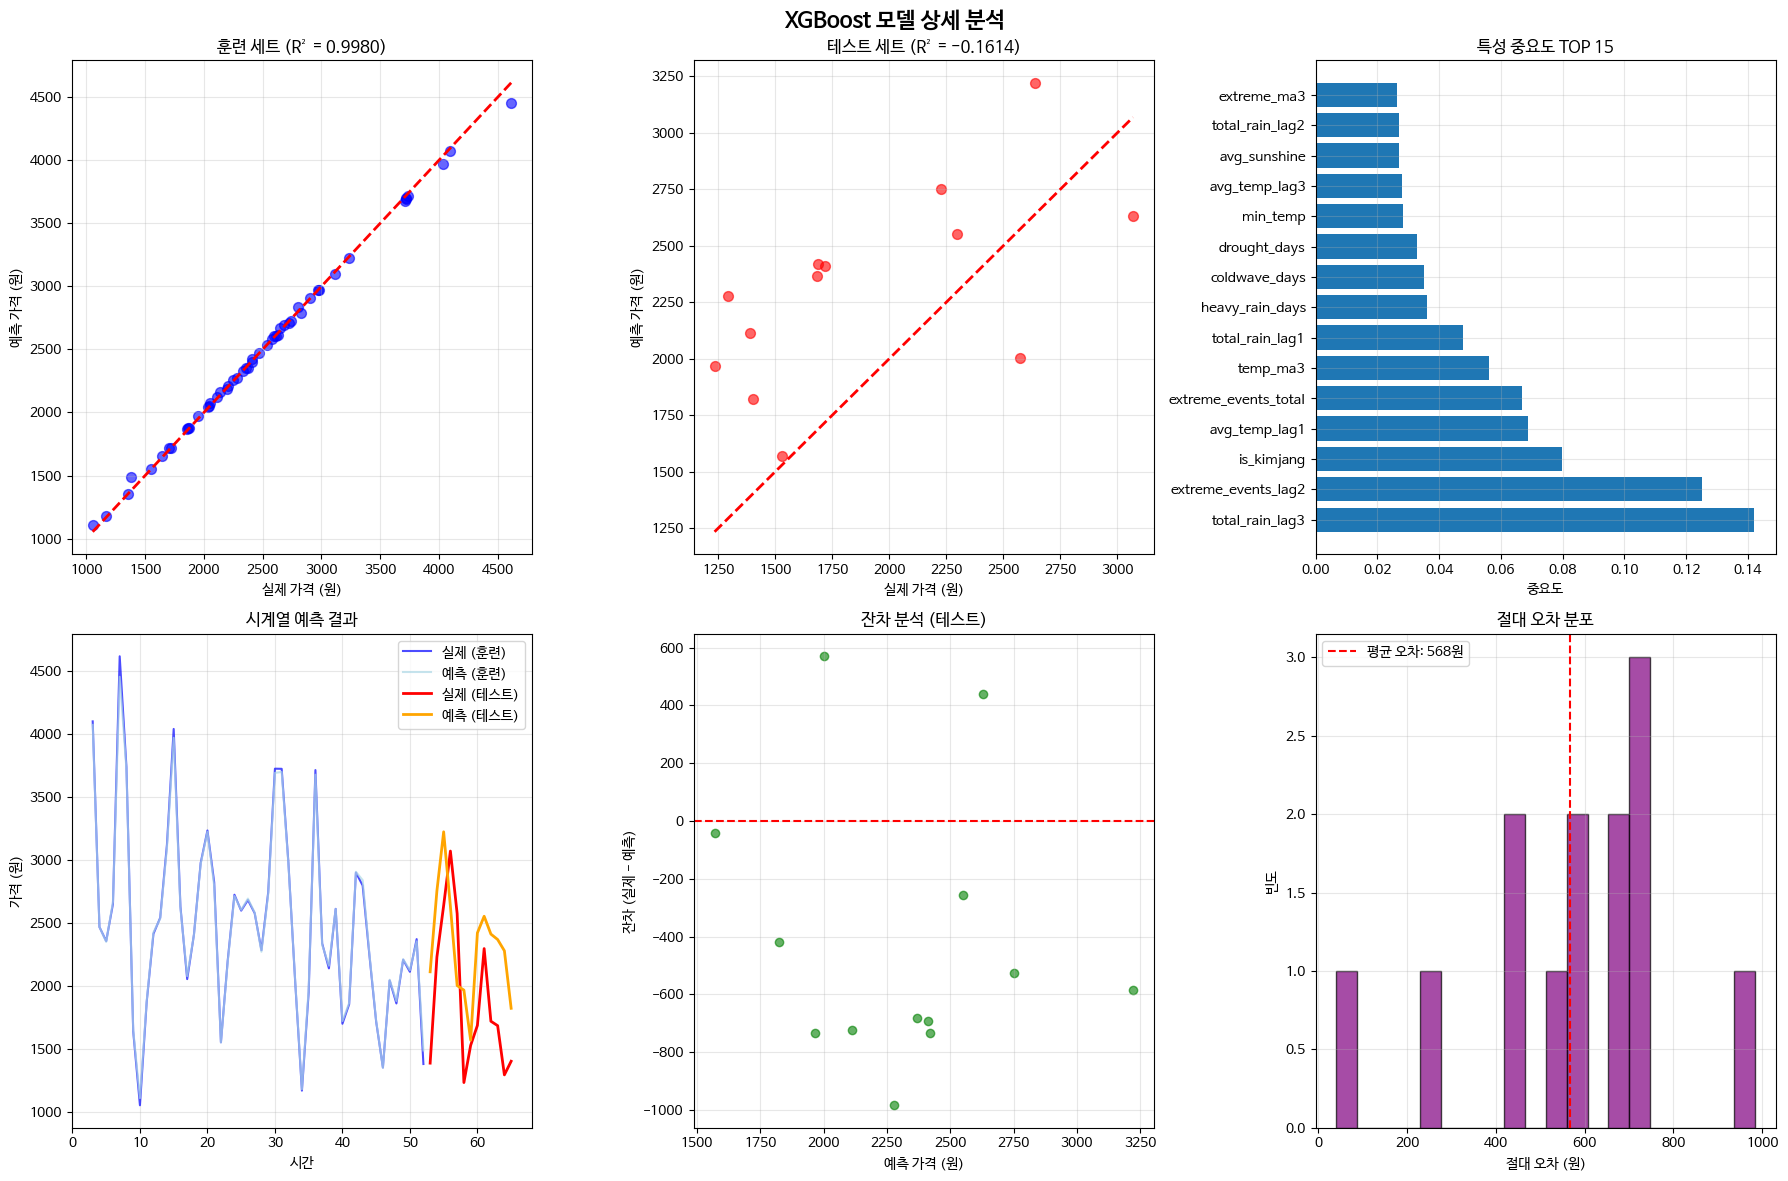


📈 오차 상세 분석:
   최대 오차: 983원
   오차 표준편차: 231원
   오차 90% 분위수: 733원
   500원 이내 예측 비율: 30.8%


In [38]:
xgb_results = train_and_evaluate_xgboost(X, y, test_size=0.2, detailed_analysis=True)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [39]:
def train_and_evaluate_lstm(X, y, sequence_length=6, test_size=0.2, detailed_analysis=True):
    """
    LSTM 모델 학습 및 상세 평가
    """
    print("\n🧠 LSTM 모델 상세 분석 시작")
    print("=" * 50)

    # 시계열 분할 (LSTM용)
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    print(f"📊 데이터 분할 (LSTM):")
    print(f"   훈련: {len(X_train)}개월")
    print(f"   테스트: {len(X_test)}개월")
    print(f"   시퀀스 길이: {sequence_length}개월")

    # 스케일링
    from sklearn.preprocessing import StandardScaler
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

    # 시퀀스 데이터 생성
    def create_sequences(X, y, seq_len):
        X_seq, y_seq = [], []
        for i in range(seq_len, len(X)):
            X_seq.append(X[i-seq_len:i])
            y_seq.append(y[i])
        return np.array(X_seq), np.array(y_seq)

    X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, sequence_length)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, sequence_length)

    print(f"   시퀀스 생성 완료:")
    print(f"   훈련 시퀀스: {X_train_seq.shape}")
    print(f"   테스트 시퀀스: {X_test_seq.shape}")

    # LSTM 모델 구축
    print(f"\n🏗️ LSTM 모델 구축:")
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(sequence_length, X_train_seq.shape[2])),
        Dropout(0.2),
        BatchNormalization(),

        LSTM(32, return_sequences=False),
        Dropout(0.2),
        BatchNormalization(),

        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    print(f"   LSTM 레이어: 64 → 32 units")
    print(f"   정규화: Dropout + BatchNormalization")
    print(f"   옵티마이저: Adam (lr=0.001)")

    # 콜백 설정
    callbacks = [
        EarlyStopping(patience=20, restore_best_weights=True, monitor='val_loss'),
        ReduceLROnPlateau(factor=0.5, patience=10, min_lr=1e-6, monitor='val_loss')
    ]

    # 모델 학습
    print(f"\n🤖 LSTM 모델 학습 중...")
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_test_seq, y_test_seq),
        epochs=100,
        batch_size=16,
        callbacks=callbacks,
        verbose=1
    )

    # 예측
    y_train_pred_scaled = model.predict(X_train_seq, verbose=0)
    y_test_pred_scaled = model.predict(X_test_seq, verbose=0)

    # 스케일링 역변환
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled).flatten()
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled).flatten()
    y_train_actual = scaler_y.inverse_transform(y_train_seq.reshape(-1, 1)).flatten()
    y_test_actual = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

    # 성능 지표 계산
    metrics = {
        'train_mae': mean_absolute_error(y_train_actual, y_train_pred),
        'test_mae': mean_absolute_error(y_test_actual, y_test_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train_actual, y_train_pred)),
        'test_rmse': np.sqrt(mean_squared_error(y_test_actual, y_test_pred)),
        'train_mape': mean_absolute_percentage_error(y_train_actual, y_train_pred) * 100,
        'test_mape': mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100,
        'train_r2': r2_score(y_train_actual, y_train_pred),
        'test_r2': r2_score(y_test_actual, y_test_pred)
    }

    # 성능 결과 출력
    print(f"\n📊 LSTM 성능 지표:")
    print(f"{'지표':<12} {'훈련':<12} {'테스트':<12} {'과적합도':<12}")
    print("-" * 50)
    print(f"{'MAE':<12} {metrics['train_mae']:<12.0f} {metrics['test_mae']:<12.0f} {metrics['test_mae']/metrics['train_mae']:<12.2f}")
    print(f"{'RMSE':<12} {metrics['train_rmse']:<12.0f} {metrics['test_rmse']:<12.0f} {metrics['test_rmse']/metrics['train_rmse']:<12.2f}")
    print(f"{'MAPE':<12} {metrics['train_mape']:<12.1f}% {metrics['test_mape']:<12.1f}% {metrics['test_mape']/metrics['train_mape']:<12.2f}")
    print(f"{'R²':<12} {metrics['train_r2']:<12.4f} {metrics['test_r2']:<12.4f} {metrics['test_r2']/metrics['train_r2']:<12.2f}")

    # 상세 분석
    if detailed_analysis:
        analyze_lstm_details(model, history, X_train_seq, X_test_seq,
                           y_train_actual, y_test_actual, y_train_pred, y_test_pred,
                           metrics, sequence_length)

    return {
        'model': model,
        'scaler_X': scaler_X,
        'scaler_y': scaler_y,
        'predictions': {'train': y_train_pred, 'test': y_test_pred},
        'actual': {'train': y_train_actual, 'test': y_test_actual},
        'metrics': metrics,
        'history': history,
        'sequence_length': sequence_length
    }

In [40]:
def analyze_lstm_details(model, history, X_train_seq, X_test_seq,
                        y_train_actual, y_test_actual, y_train_pred, y_test_pred,
                        metrics, sequence_length):
    """
    LSTM 모델 상세 분석 및 시각화
    """
    print(f"\n🔍 LSTM 상세 분석:")

    # 1. 학습 과정 분석
    print(f"\n📈 학습 과정:")
    print(f"   총 에포크: {len(history.history['loss'])}")
    print(f"   최종 훈련 손실: {history.history['loss'][-1]:.4f}")
    print(f"   최종 검증 손실: {history.history['val_loss'][-1]:.4f}")
    print(f"   최고 검증 성능 에포크: {np.argmin(history.history['val_loss']) + 1}")

    # 2. 시각화
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('LSTM 모델 상세 분석', fontsize=16, fontweight='bold')

    # 2-1. 학습 곡선 (Loss)
    axes[0, 0].plot(history.history['loss'], label='훈련 손실', color='blue')
    axes[0, 0].plot(history.history['val_loss'], label='검증 손실', color='red')
    axes[0, 0].set_xlabel('에포크')
    axes[0, 0].set_ylabel('손실 (MSE)')
    axes[0, 0].set_title('학습 곡선 - 손실')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2-2. 학습 곡선 (MAE)
    axes[0, 1].plot(history.history['mae'], label='훈련 MAE', color='blue')
    axes[0, 1].plot(history.history['val_mae'], label='검증 MAE', color='red')
    axes[0, 1].set_xlabel('에포크')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].set_title('학습 곡선 - MAE')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 2-3. 예측 vs 실제 (테스트)
    axes[0, 2].scatter(y_test_actual, y_test_pred, alpha=0.6, color='red', s=50)
    axes[0, 2].plot([y_test_actual.min(), y_test_actual.max()],
                    [y_test_actual.min(), y_test_actual.max()], 'r--', linewidth=2)
    axes[0, 2].set_xlabel('실제 가격 (원)')
    axes[0, 2].set_ylabel('예측 가격 (원)')
    axes[0, 2].set_title(f'예측 vs 실제 (R² = {metrics["test_r2"]:.4f})')
    axes[0, 2].grid(True, alpha=0.3)

    # 2-4. 시계열 예측 결과
    train_range = range(len(y_train_actual))
    test_range = range(len(y_train_actual), len(y_train_actual) + len(y_test_actual))

    axes[1, 0].plot(train_range, y_train_actual, label='실제 (훈련)', color='blue', alpha=0.7)
    axes[1, 0].plot(train_range, y_train_pred, label='예측 (훈련)', color='lightblue', alpha=0.7)
    axes[1, 0].plot(test_range, y_test_actual, label='실제 (테스트)', color='red', linewidth=2)
    axes[1, 0].plot(test_range, y_test_pred, label='예측 (테스트)', color='orange', linewidth=2)
    axes[1, 0].set_xlabel('시간 (시퀀스 조정됨)')
    axes[1, 0].set_ylabel('가격 (원)')
    axes[1, 0].set_title(f'LSTM 시계열 예측 (시퀀스: {sequence_length}개월)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 2-5. 잔차 분석
    residuals_test = y_test_actual - y_test_pred
    axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.6, color='green')
    axes[1, 1].axhline(y=0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('예측 가격 (원)')
    axes[1, 1].set_ylabel('잔차 (실제 - 예측)')
    axes[1, 1].set_title('LSTM 잔차 분석')
    axes[1, 1].grid(True, alpha=0.3)

    # 2-6. 오차 분포
    absolute_errors = np.abs(residuals_test)
    axes[1, 2].hist(absolute_errors, bins=15, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 2].axvline(metrics['test_mae'], color='red', linestyle='--',
                       label=f'평균 오차: {metrics["test_mae"]:.0f}원')
    axes[1, 2].set_xlabel('절대 오차 (원)')
    axes[1, 2].set_ylabel('빈도')
    axes[1, 2].set_title('LSTM 절대 오차 분포')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 3. 시계열 특성 분석
    print(f"\n🕐 시계열 특성 분석:")
    print(f"   최대 오차: {np.max(absolute_errors):.0f}원")
    print(f"   오차 표준편차: {np.std(absolute_errors):.0f}원")
    print(f"   오차 90% 분위수: {np.percentile(absolute_errors, 90):.0f}원")
    print(f"   500원 이내 예측 비율: {(absolute_errors <= 500).mean()*100:.1f}%")

    # 4. 시퀀스 길이 효과 분석
    recent_errors = absolute_errors[-6:]  # 최근 6개월 오차
    early_errors = absolute_errors[:6]    # 초기 6개월 오차
    print(f"   초기 6개월 평균 오차: {np.mean(early_errors):.0f}원")
    print(f"   최근 6개월 평균 오차: {np.mean(recent_errors):.0f}원")


🧠 LSTM 모델 상세 분석 시작
📊 데이터 분할 (LSTM):
   훈련: 50개월
   테스트: 13개월
   시퀀스 길이: 6개월
   시퀀스 생성 완료:
   훈련 시퀀스: (44, 6, 35)
   테스트 시퀀스: (7, 6, 35)

🏗️ LSTM 모델 구축:
   LSTM 레이어: 64 → 32 units
   정규화: Dropout + BatchNormalization
   옵티마이저: Adam (lr=0.001)

🤖 LSTM 모델 학습 중...
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - loss: 1.0798 - mae: 0.8101 - val_loss: 1.1493 - val_mae: 0.9965 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.9260 - mae: 0.7985 - val_loss: 1.1376 - val_mae: 0.9911 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7392 - mae: 0.6639 - val_loss: 1.1434 - val_mae: 0.9971 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5466 - mae: 0.5680 - val_loss: 1.1592 - val_mae: 1.0070 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4611 - mae: 0.5083 - val_loss: 1.1665 - val_mae: 1.0112 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 

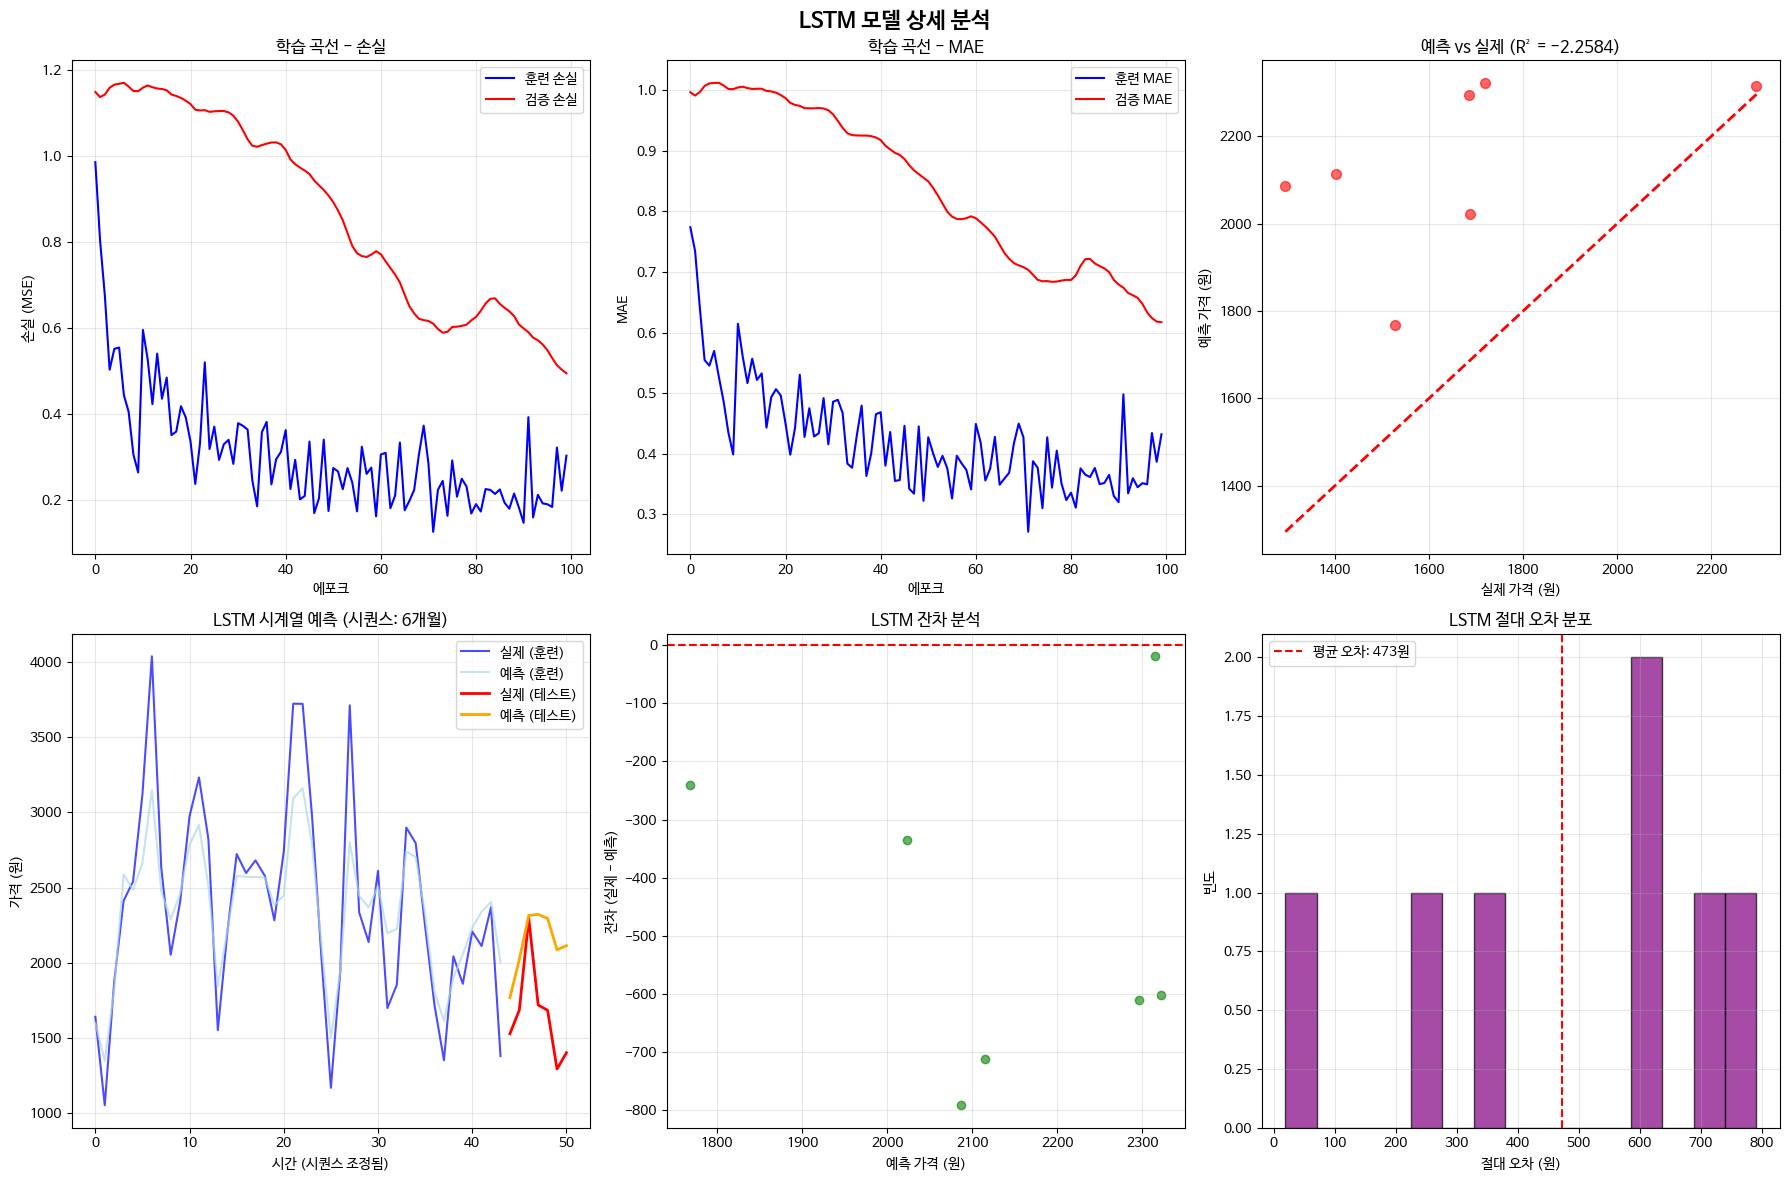


🕐 시계열 특성 분석:
   최대 오차: 792원
   오차 표준편차: 260원
   오차 90% 분위수: 744원
   500원 이내 예측 비율: 42.9%
   초기 6개월 평균 오차: 433원
   최근 6개월 평균 오차: 512원


In [41]:
lstm_results = train_and_evaluate_lstm(X, y, sequence_length=6, test_size=0.2, detailed_analysis=True)

In [44]:
def compare_models(xgb_results, lstm_results):
    """
    XGBoost와 LSTM 모델 성능 비교
    """
    print("\n🏆 XGBoost vs LSTM 성능 비교")
    print("=" * 60)

    # 성능 지표 비교 테이블
    comparison = pd.DataFrame({
        'XGBoost': [
            xgb_results['metrics']['test_mae'],
            xgb_results['metrics']['test_rmse'],
            xgb_results['metrics']['test_mape'],
            xgb_results['metrics']['test_r2']
        ],
        'LSTM': [
            lstm_results['metrics']['test_mae'],
            lstm_results['metrics']['test_rmse'],
            lstm_results['metrics']['test_mape'],
            lstm_results['metrics']['test_r2']
        ]
    }, index=['MAE (원)', 'RMSE (원)', 'MAPE (%)', 'R²'])

    # 승자 결정
    comparison['승자'] = ['XGBoost' if comparison.loc[idx, 'XGBoost'] < comparison.loc[idx, 'LSTM'] else 'LSTM'
                      for idx in ['MAE (원)', 'RMSE (원)', 'MAPE (%)', 'R²']]
    comparison.loc['R²', '승자'] = 'XGBoost' if comparison.loc['R²', 'XGBoost'] > comparison.loc['R²', 'LSTM'] else 'LSTM'

    print(comparison)

    # 시각적 비교
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # 성능 지표 비교 차트
    metrics_names = ['MAE', 'RMSE', 'MAPE', 'R²']
    xgb_values = [xgb_results['metrics']['test_mae'], xgb_results['metrics']['test_rmse'],
                  xgb_results['metrics']['test_mape'], xgb_results['metrics']['test_r2']]
    lstm_values = [lstm_results['metrics']['test_mae'], lstm_results['metrics']['test_rmse'],
                   lstm_results['metrics']['test_mape'], lstm_results['metrics']['test_r2']]

    x = np.arange(len(metrics_names))
    width = 0.35

    axes[0].bar(x - width/2, xgb_values, width, label='XGBoost', color='skyblue', alpha=0.8)
    axes[0].bar(x + width/2, lstm_values, width, label='LSTM', color='lightcoral', alpha=0.8)
    axes[0].set_xlabel('성능 지표')
    axes[0].set_ylabel('값')
    axes[0].set_title('XGBoost vs LSTM 성능 비교')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(metrics_names)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # 예측 정확도 비교 (산점도)
    # 테스트 데이터에서 공통 부분 추출 (LSTM은 시퀀스 길이만큼 짧음)
    seq_len = lstm_results['sequence_length']
    xgb_test_subset = xgb_results['predictions']['test'][-len(lstm_results['predictions']['test']):]
    xgb_actual_subset = xgb_results['actual']['test'][-len(lstm_results['actual']['test']):]

    axes[1].scatter(xgb_actual_subset, xgb_test_subset, alpha=0.6, color='blue',
                   s=50, label='XGBoost')
    axes[1].scatter(lstm_results['actual']['test'], lstm_results['predictions']['test'],
                   alpha=0.6, color='red', s=50, label='LSTM')

    # 완벽한 예측선
    all_actual = np.concatenate([xgb_actual_subset, lstm_results['actual']['test']])
    min_val, max_val = all_actual.min(), all_actual.max()
    axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, alpha=0.8)

    axes[1].set_xlabel('실제 가격 (원)')
    axes[1].set_ylabel('예측 가격 (원)')
    axes[1].set_title('예측 정확도 비교 (테스트 세트)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 종합 평가
    print(f"\n🎯 종합 평가:")

    # 각 지표별 승자 카운트
    xgb_wins = sum([1 for winner in comparison['승자'] if winner == 'XGBoost'])
    lstm_wins = sum([1 for winner in comparison['승자'] if winner == 'LSTM'])

    print(f"   XGBoost 우승 지표: {xgb_wins}개")
    print(f"   LSTM 우승 지표: {lstm_wins}개")

    if xgb_wins > lstm_wins:
        print(f"   🏆 종합 우승: XGBoost")
        print(f"   주요 강점: 특성 중요도 해석 가능, 안정적 성능")
    elif lstm_wins > xgb_wins:
        print(f"   🏆 종합 우승: LSTM")
        print(f"   주요 강점: 시계열 패턴 학습, 장기 의존성 포착")
    else:
        print(f"   🤝 무승부: 두 모델 모두 우수한 성능")

    # 실용적 권장사항
    print(f"\n💡 실용적 권장사항:")
    if xgb_results['metrics']['test_mape'] < 20:
        print(f"   XGBoost: MAPE {xgb_results['metrics']['test_mape']:.1f}% - 실용적 수준")
    else:
        print(f"   XGBoost: MAPE {xgb_results['metrics']['test_mape']:.1f}% - 추가 개선 필요")

    if lstm_results['metrics']['test_mape'] < 20:
        print(f"   LSTM: MAPE {lstm_results['metrics']['test_mape']:.1f}% - 실용적 수준")
    else:
        print(f"   LSTM: MAPE {lstm_results['metrics']['test_mape']:.1f}% - 추가 개선 필요")


🏆 XGBoost vs LSTM 성능 비교
             XGBoost        LSTM       승자
MAE (원)   567.849487  472.971924     LSTM
RMSE (원)  613.127242  539.759226     LSTM
MAPE (%)   33.657458   31.360700     LSTM
R²         -0.161385   -2.258413  XGBoost


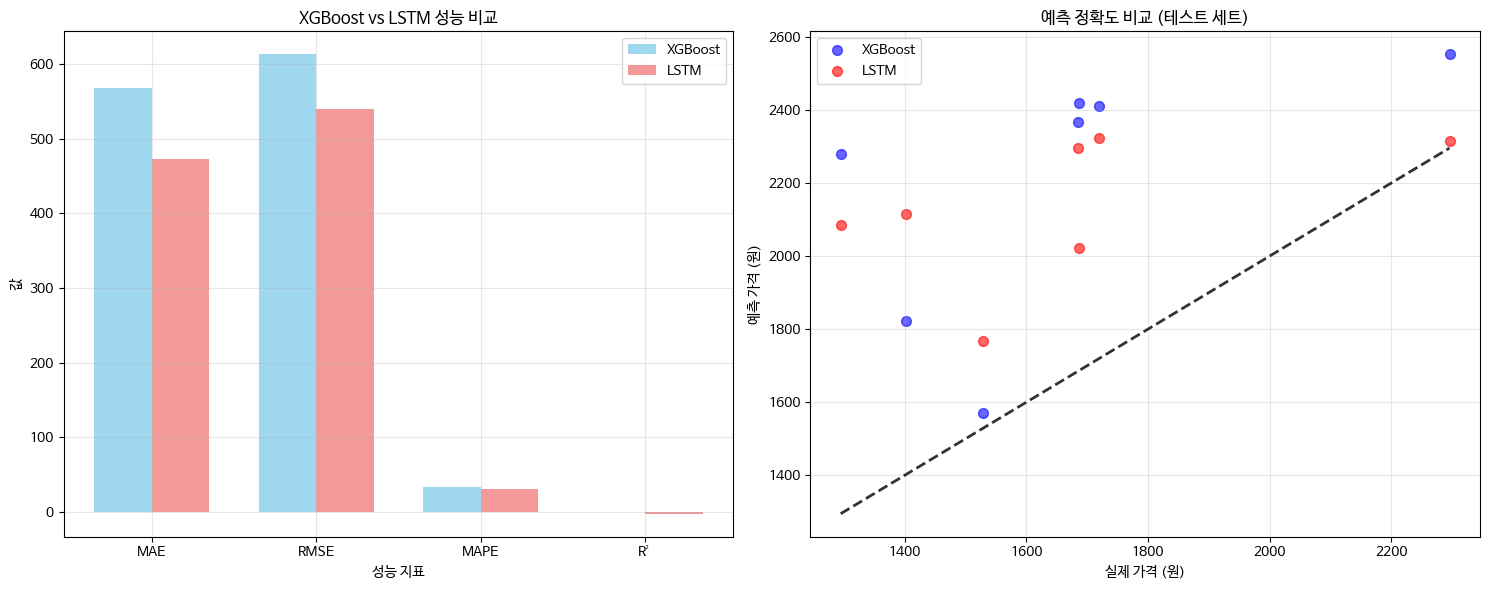


🎯 종합 평가:
   XGBoost 우승 지표: 1개
   LSTM 우승 지표: 3개
   🏆 종합 우승: LSTM
   주요 강점: 시계열 패턴 학습, 장기 의존성 포착

💡 실용적 권장사항:
   XGBoost: MAPE 33.7% - 추가 개선 필요
   LSTM: MAPE 31.4% - 추가 개선 필요


In [45]:
compare_models(xgb_results, lstm_results)

In [46]:
print(f"XGBoost 최고 특성: {xgb_results['model'].feature_importances_.argmax()}")
print(f"LSTM 최적 에포크: {len(lstm_results['history'].history['loss'])}")

XGBoost 최고 특성: 22
LSTM 최적 에포크: 100
